## DSCI_633 - Foundations of Data Science and Analytics Project by Team 3
- Omkar Khanvilkar
- Pranav Nair
- Sujan Dutta
- Varun Tandon

## Problem Description
<p>&nbsp;</p>

<div style="text-align: justify">Identifying customer sentiments is an important task in any business-to-customer (B2C) domain since it helps businesses to identify the areas of improvement by taking into account the interests of the users. Some of ways of identifying user sentiments include conducting a survey at regular intervals asking customers their likes, dislikes and preferences, capturing regular feedback regarding user experience etc. But, surveying customers and asking for feedback regularly can prove tedious for the users and hamper the user experience. Hence, we look at an alternate method of deducing user sentiment, by analysing the user behaviour.</div>  


![hotstar_logo](images\Disney-Hotstar-Logo.jpg)

<p>&nbsp;</p>

<div style="text-align: justify">This problem focusses on one such use case pertaining to the Indian online streaming platform Disney+ Hotstar. Here we have a dataset that contains the geotagged watch time for 200,000 users who use the platform, along with a surveyed poll that represents their sentiment about the platform. This survey poll can be thought of a pop-up that appears once when the user is using the platform and surveys whether their experience on the platform has been good or not.  
Our task is to build a machine learning model that can take these user watch times and sentiments of the customers and learn to predict the sentiments for future users..</div>

## Data Description

The dataset file for this project is hosted in the [given link](https://he-s3.s3.amazonaws.com/media/hackathon/machine-learning-indiahacks-2017/5f828822-4--4-hotstar_dataset.zip). 
The dataset consists of three files:
    - `train.json` - This is our training dataset that contains the features and target variables for 200000 users 
    - `test.json` - This our testing dataset that contains only the features for 100000 users. This is the data on which we shall be predicting using our ML model.
    
## Evaluation Metric

The evaluation metric for our problem shall be `roc_auc_score`

#### Importing the necessary libraries

In [1]:
import pickle
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Loading the data

In [2]:
df = pd.read_json("./data/train_data.json")
df.head()

,train-121672,train-121673,train-121670,train-121671,train-121676,train-121677,train-121674,train-121675,train-121678,train-121679,...,train-126321,train-126320,train-126323,train-126322,train-126325,train-126324,train-126327,train-126326,train-126329,train-126328
genres,"Drama:6,Cricket:3469,Wildlife:79","Drama:48949,Family:9927,Crime:1901,Romance:165...","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","Romance:77,Drama:122,Cricket:3883",TalkShow:8529,TalkShow:5,"Cricket:0,Wildlife:21,Crime:29591,Drama:10,Liv...","Romance:724,Cricket:5854,Reality:77","Drama:10090,Cricket:1124,Comedy:18907",Family:1080,...,"Drama:50,Action:582,Comedy:487","Cricket:13504,Family:17267,Reality:151,Romance...",Drama:31082,"Cricket:450,Kids:6,TalkShow:20,Wildlife:40,Rom...","Cricket:14345,Badminton:97,Reality:69,Crime:249","Cricket:3787,Reality:57","Cricket:5060,Awards:21,Crime:1872","Drama:25428,Family:7","Drama:50749,Romance:9","Cricket:17417,Reality:14947,Drama:14565,LiveTV..."
titles,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","India vs Australia 1st Test Hindi:83,India vs ...","Rangoon:77,India A vs England XI:3883,Kaabil:122",Koffee With Karan:8529,Neeya Naana:5,"Yeh Rishta Kya Kehlata Hai:10,Life Ok:4,Savdha...","India vs England 2nd T20I English:373,India vs...","Samson's Sparkling 102 vs RPS:10,Bheja Fry 2:4...",Saath Nibhaana Saathiya:1080,...,"Dishoom:574,Kaabil:50,Housefull 3:487,Force:8","Aus 1st Innings: Fall of Wickets:359,Day 4: In...",P_O_W_ Bandi Yuddh Ke:31082,"Local Boy Jadhav Shines with 120:229,Movies OK...","Stokes's 38 Goes in Vain:22,Yuvraj: The Scorin...","Local Boy Jadhav Shines with 120:134,India Fin...","Savdhaan India:1872,Watch: England Fall of Wic...","Potol Kumar Gaanwala:1,Kusum Dola:25426,Mem Bo...","Nadaan Parinde:0,Phillauri:9,Yeh Rishta Kya Ke...","India vs Australia 2nd Test English:3222,India..."
cities,"delhi:3492,mumbai:64","ahmedabad:56666,mumbai:26989",navi mumbai:29400,"chennai:77,navi mumbai:4005,mumbai:0","bangalore:5135,krishnarajapura:529,hosur:2864",bangalore:5,"gurgaon:12635,delhi:13142,nagari:3885","bangalore:373,chennai:6205,mumbai:77","gurgaon:1124,delhi:9492,mumbai:19504","rawalpindi:976,lahore:104",...,bangalore:1120,gurgaon:31707,mumbai:31082,"delhi:1620,navi mumbai:8848",mumbai:14760,"khanna:2295,mumbai:1548","lisboa:3756,porto:3198",kolkata:25436,"chennai:7999,delhi:8945,ahmedabad:33811",navi mumbai:49286
segment,neg,neg,neg,neg,pos,neg,neg,neg,neg,neg,...,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg
dow,"5:482,4:3008,7:64","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","1:77,2:3883,5:122","1:6150,3:2378",2:5,"1:15909,3:2465,2:5580,4:293,7:1283,6:4131","3:5481,4:724,7:373,6:77","1:6965,3:21,2:6183,5:1434,4:6995,7:4599,6:3923","1:1043,7:37",...,"5:50,7:1069","1:6095,3:5684,2:2943,5:6635,4:2750,7:2274,6:5316","1:6255,3:10275,2:6019,4:197,7:6901,6:1435","1:229,5:2196,7:8022,6:20","1:1333,3:147,2:249,5:304,4:7825,7:4900","1:1108,5:40,4:220,7:2472","1:948,5:2317,7:3688","1:2562,3:3153,2:5009,5:3875,4:4274,7:3284,6:3278","1:11880,3:7673,2:17472,5:2759,4:5122,7:4836,6:...","1:11425,3:7989,2:6421,5:4460,4:4157,7:7896,6:6928"


It looks like the index should be the columns and the columns should be the rows. So the dataframe will have to be transposed

In [3]:
# transpose
df = df.T
df.head()

,genres,titles,cities,segment,dow,tod
train-121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320"
train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936..."
train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2..."
train-121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083"
train-121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6"


As we can see that we have the following features
    - genres
    - titles
    - cities
    - dow (day of the week)
    - tod (time of the day)
And our target variable is `segment`.

In [4]:
# Checking for the null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train-121672 to train-126328
Data columns (total 6 columns):
genres     200000 non-null object
titles     200000 non-null object
cities     200000 non-null object
segment    200000 non-null object
dow        200000 non-null object
tod        200000 non-null object
dtypes: object(6)
memory usage: 15.7+ MB


We can see that there are no null values in the dataset and it is pretty clean

In [5]:
# Checking for the number of categories in the target
print("There are", len(df['segment'].unique()), "categories in target: ",df['segment'].unique()[0]," and ", df['segment'].unique()[1])

There are 2 categories in target:  neg  and  pos


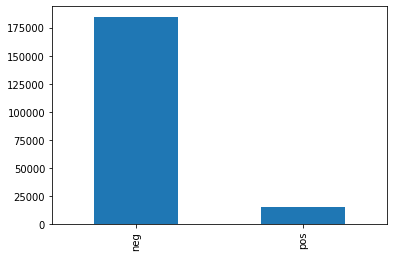

In [6]:
# Checking for the distribution of the target variables
df['segment'].value_counts().plot.bar();

We can see that the target is heavily imbalanced.

#### Analysing 100 rows initially
Since we have a large number of observations, computation on all the rows can take large time. Hence, we take a subset of 100 rows so that we can analyse the data by executing the code faster. 

In [7]:
# Select the top 100 rows for ease of computation
df_100 = df.iloc[:100, :]

In [8]:
# Checking the imbalance in the target
(df_100['segment'].value_counts()/df_100['segment'].value_counts().sum())*100

neg    92.0
pos     8.0
Name: segment, dtype: float64

The imbalance is pretty high even for the subset of 100 rows

#### Modifying the index
We can see that our current index of the dataframe has the word `train` attached before every user-id. Let us extract just the user ids from this and set them as the index. The below function helps us in doing this 

In [9]:
def add_index(df):
    df["user_id"] = df.index
    df["user_id"] = df['user_id'].apply(lambda x:x.split("-")[1])
    df = df.set_index("user_id")
    return df

In [10]:
df_100 = add_index(df_100)

In [11]:
df_100.head()

,genres,titles,cities,segment,dow,tod
user_id,,,,,,
121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64",neg,"5:482,4:3008,7:64","18:1372,21:1862,17:320"
121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989",neg,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936..."
121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,neg,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2..."
121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0",neg,"1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083"
121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,"1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6"


#### Change the column positions
The below function is a helper function that can help us change the postion of our columns in the dataframe.
By using the below function, we insert the target column i.e `segment` into the last position i.e. at index 7

In [12]:
# Helper function the change the column positions
def change_column_position(dataframe, column_name, new_index):
    '''
    Rearranges the columns in a dataframe as per the new 
    indices specified in the new_index parameter
    
    Datatypes
    dataframe - pandas.DataFrame
    column_name - list
    new_index - list
    '''
    column_names = list(dataframe.columns)
    for column,index in zip(column_name, new_index):
        old_index = column_names.index(column)
        column_names.pop(old_index)
        column_names.insert(index, column)
    return dataframe[column_names]

In [13]:
df_100 = change_column_position(df_100, ["segment"], [7])

df_100

,genres,titles,cities,dow,tod,segment
user_id,,,,,,
121672,"Drama:6,Cricket:3469,Wildlife:79","Wild Sex:79,Vintage Dhoni Comes Good with 134:...","delhi:3492,mumbai:64","5:482,4:3008,7:64","18:1372,21:1862,17:320",neg
121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...","Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",neg
121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...","India vs Australia 1st Test Hindi:83,India vs ...",navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",neg
121671,"Romance:77,Drama:122,Cricket:3883","Rangoon:77,India A vs England XI:3883,Kaabil:122","chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","10:122,12:77,15:1800,14:0,16:2083",neg
121676,TalkShow:8529,Koffee With Karan:8529,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378","20:529,21:1257,22:4930,23:538,19:1268,18:6",pos
...,...,...,...,...,...,...
191960,"Drama:13,Cricket:163,Comedy:94","Watch How SRH Won IPL 2016:163,Golmaal 3:94,MS...",bangalore:270,"2:257,6:13","18:94,13:13,15:163",neg
124944,"TalkShow:334,Football:1160","Live | Liverpool vs Swansea City:13,Live | Sto...",kolkata:1494,"1:334,6:1160","19:13,20:172,21:334,22:975",neg
121880,"Drama:6,Romance:371,Cricket:1664","RPS vs DD:4,Yeh Rishta Kya Kehlata Hai:6,MI vs...","bangalore:1617,navi mumbai:425","3:40,2:384,4:1617","13:57,14:1458,22:11,16:102,19:34,21:378",neg


#### Splitting the cities column

Now, the idea is to take each of the `cities`, `time of days`, `days of week`, `genres` column and extract all the subtypes in these features and use them as separate features with their watch time as the feature values. 

For example, let's take the `cities` column first

In [14]:
df_100['cities'].tolist()

['delhi:3492,mumbai:64',
 'ahmedabad:56666,mumbai:26989',
 'navi mumbai:29400',
 'chennai:77,navi mumbai:4005,mumbai:0',
 'bangalore:5135,krishnarajapura:529,hosur:2864',
 'bangalore:5',
 'gurgaon:12635,delhi:13142,nagari:3885',
 'bangalore:373,chennai:6205,mumbai:77',
 'gurgaon:1124,delhi:9492,mumbai:19504',
 'rawalpindi:976,lahore:104',
 'kolkata:16889,delhi:180,chennai:245',
 'kolkata:143,gurgaon:84201,chennai:25671,mumbai:72465',
 'kolkata:2490,mumbai:329',
 'mumbai:990',
 'delhi:4655,navi mumbai:22',
 'pune:33,chennai:38097,navi mumbai:28054,mumbai:2217',
 'navi mumbai:3810',
 'pune:17288,delhi:5139,gurgaon:12,mumbai:2111',
 'mumbai:37',
 'new delhi:58,delhi:4162,ahmedabad:23408,mumbai:18809',
 'hyderabad:1026',
 'delhi:1286,navi mumbai:202723,mumbai:1508',
 'navi mumbai:10667',
 'chennai:7895,delhi:258,nagar:375',
 'ludhiana:4543',
 'kolkata:984,bangalore:55260',
 'new delhi:6418,gurgaon:74,delhi:3715,bangalore:776,mumbai:5608',
 'bangalore:21889,chennai:2505',
 'mumbai:28855',
 

Lets take the first user i.e. the user having the ID 121672. 

In [15]:
first_row = df_100.iloc[0, :]['cities']
first_row

'delhi:3492,mumbai:64'

We can see that the first user has 2 cities - delhi and mumbai and the user has a watch time of 3492 seconds in Delhi and 64 seconds in Mumbai. We have to convert the above string into a feature for every city and the value of the watch time as the value for the feature.

In [16]:
# First row
first_row_df = pd.DataFrame({i.split(":")[0]:[int(i.split(":")[1])] for i in first_row.split(",")})
first_row_df

,delhi,mumbai
0,3492,64


Similarly doing the same thing for the second row

In [17]:
# Second Row
second_row = df.iloc[1, :]['cities']
second_row_df = pd.DataFrame({i.split(":")[0]:[int(i.split(":")[1])] for i in second_row.split(",")})
second_row_df

,ahmedabad,mumbai
0,56666,26989


Now let's combine the two dataframes

In [18]:
combined = pd.concat([first_row_df, second_row_df], ignore_index=True, sort=False)
combined

,delhi,mumbai,ahmedabad
0,3492.0,64,NaN
1,NaN,26989,56666.0


Let us fill the NaN values with 0

In [19]:
combined
combined.fillna(0, inplace=True)
combined

,delhi,mumbai,ahmedabad
0,3492.0,64,0.0
1,0.0,26989,56666.0


This is exactly what we have to do with the cities column for all the users. Let us now apply the transformation on the entire `cities` columns for `df_100`

In [20]:
cities = []

for row in df_100['cities']:
    row_df = pd.DataFrame({i.split(":")[0]:[int(i.split(":")[1])] for i in row.split(",")})
    
    cities.append(row_df)
    
cities = pd.concat(cities, ignore_index=True, sort=False)
cities.index = df_100.index
cities.fillna(0, inplace=True)

cities.head()

,delhi,mumbai,ahmedabad,navi mumbai,chennai,bangalore,krishnarajapura,hosur,gurgaon,nagari,...,dhaka,karachi,madikeri,kochi,peshawar,ann arbor,naihati,prabhadevi,suri,gandhinagar
user_id,,,,,,,,,,,,,,,,,,,,,
121672,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,0.0,26989.0,56666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121670,0.0,0.0,0.0,29400.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121671,0.0,0.0,0.0,4005.0,77.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121676,0.0,0.0,0.0,0.0,0.0,5135.0,529.0,2864.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting the genres column
Let us now do the same with the genres column as well

In [21]:
first_row = df_100.iloc[0, :]['genres']
first_row_df = pd.DataFrame({i.split(":")[0]:[int(i.split(":")[1])] for i in first_row.split(",")})
first_row_df

,Drama,Cricket,Wildlife
0,6,3469,79


The `genres` column for the first row looks like the one above

#### Writing a custom function to split the columns
Let us write a function `split_into_df()`  which takes a column name a splits that column in `df_100` into a dataframe of the subtypes 

In [22]:
def split_into_df(column_name):
    dataframe = []

    for row in df_100[column_name]:
        row_df = pd.DataFrame({i.split(":")[0]:[int(i.split(":")[1])] for i in row.split(",")})

        dataframe.append(row_df)

    dataframe = pd.concat(dataframe, ignore_index=True, sort=False)
    dataframe.index = df_100.index
    dataframe.fillna(0, inplace=True)
    return dataframe

Now let us use this function to split the `genres`

In [23]:
genres = split_into_df("genres")
genres

,Drama,Cricket,Wildlife,Family,Crime,Romance,Action,Comedy,LiveTV,TalkShow,...,Football,Badminton,Sport,Awards,Travel,Teen,Mythology,Kids,Formula1,Science
user_id,,,,,,,,,,,,,,,,,,,,,
121672,6.0,3469.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,48949.0,0.0,0.0,9927.0,1901.0,16571.0,2064.0,4225.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121670,20873.0,5715.0,0.0,2777.0,0.0,0.0,14.0,15.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121671,122.0,3883.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8529.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191960,13.0,163.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,...,1160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121880,6.0,1664.0,0.0,0.0,0.0,371.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting the `dow`(day of week) column
Let us use the same function to split `dow` and rename the column names from `1`, `2`, `3` etc. to `Sunday`, `Monday` etc.

In [24]:
dow = split_into_df("dow")
dow.rename(columns={"1":"Sunday", "2":"Monday", "3":"Tuesday", "4":"Wednesday", "5":"Thursday", 
             "6":"Friday", "7":"Saturday"}, inplace=True)
dow

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday
user_id,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0
...,...,...,...,...,...,...,...
191960,0.0,0.0,0.0,0.0,0.0,257.0,13.0
124944,0.0,0.0,0.0,334.0,0.0,0.0,1160.0
121880,0.0,1617.0,0.0,0.0,40.0,384.0,0.0


#### Splitting the `tod`(time of the day) column
Similary let us split the `tod` column and modify the column names to convey the `am` and `pm` times as well.

In [25]:
tod = split_into_df("tod")
tod_columns = tod.columns.tolist()

for ind in range(len(tod_columns)):
    if int(tod_columns[ind])==0:
        tod_columns[ind] = "12 am";
    elif int(tod_columns[ind])==12:
        tod_columns[ind] = "12 pm"
    elif int(tod_columns[ind])<12:
        tod_columns[ind]=tod_columns[ind]+" am"
    elif int(tod_columns[ind])<24:
        tod_columns[ind] = str(int(tod_columns[ind])-12)+" pm"
        
tod.columns = tod_columns

tod

,6 pm,9 pm,5 pm,11 am,10 am,1 pm,12 pm,8 pm,4 pm,7 pm,...,2 am,9 am,3 pm,2 pm,8 am,7 am,6 am,5 am,3 am,4 am
user_id,,,,,,,,,,,,,,,,,,,,,
121672,1372.0,1862.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,4274.0,9360.0,5734.0,7726.0,3521.0,2067.0,3844.0,4608.0,4438.0,3822.0,...,9807.0,2005.0,967.0,2807.0,0.0,0.0,0.0,0.0,0.0,0.0
121670,101.0,3430.0,0.0,302.0,1594.0,331.0,133.0,3802.0,0.0,3683.0,...,0.0,4388.0,1640.0,3083.0,201.0,504.0,1874.0,0.0,0.0,0.0
121671,0.0,0.0,0.0,0.0,122.0,0.0,77.0,0.0,2083.0,0.0,...,0.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121676,6.0,1257.0,0.0,0.0,0.0,0.0,0.0,529.0,0.0,1268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191960,94.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124944,0.0,334.0,0.0,0.0,0.0,0.0,0.0,172.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121880,0.0,378.0,0.0,0.0,0.0,57.0,0.0,0.0,102.0,34.0,...,0.0,0.0,0.0,1458.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting the cities column

In [27]:
cities = split_into_df("cities")
cities

,delhi,mumbai,ahmedabad,navi mumbai,chennai,bangalore,krishnarajapura,hosur,gurgaon,nagari,...,dhaka,karachi,madikeri,kochi,peshawar,ann arbor,naihati,prabhadevi,suri,gandhinagar
user_id,,,,,,,,,,,,,,,,,,,,,
121672,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,0.0,26989.0,56666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121670,0.0,0.0,0.0,29400.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121671,0.0,0.0,0.0,4005.0,77.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121676,0.0,0.0,0.0,0.0,0.0,5135.0,529.0,2864.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191960,0.0,0.0,0.0,0.0,0.0,270.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121880,0.0,0.0,0.0,425.0,0.0,1617.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Concatinating the split columns of all the features into a single dataframe by joining on the `user_id`

In [28]:
# Concat column wise
main_df_100 = pd.concat([df_100,cities, genres, tod, dow], axis=1)

# Dropping original features
main_df_100.drop(columns=['genres', 'titles', 'cities', 'dow', 'tod'], axis=1, inplace=True)

main_df_100.head()

,segment,delhi,mumbai,ahmedabad,navi mumbai,chennai,bangalore,krishnarajapura,hosur,gurgaon,...,5 am,3 am,4 am,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday
user_id,,,,,,,,,,,,,,,,,,,,,
121672,neg,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,482.0,3008.0,64.0,0.0,0.0,0.0,0.0
121673,neg,0.0,26989.0,56666.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0
121670,neg,0.0,0.0,0.0,29400.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0
121671,neg,0.0,0.0,0.0,4005.0,77.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,122.0,0.0,0.0,77.0,0.0,3883.0,0.0
121676,pos,0.0,0.0,0.0,0.0,0.0,5135.0,529.0,2864.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0


Lets change the position of the target and make it the last column

In [29]:
main_df_100 = change_column_position(main_df_100, ["segment"], [87])

main_df_100.head()

,delhi,mumbai,ahmedabad,navi mumbai,chennai,bangalore,krishnarajapura,hosur,gurgaon,nagari,...,3 am,4 am,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,segment
user_id,,,,,,,,,,,,,,,,,,,,,
121672,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,neg
121673,0.0,26989.0,56666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,neg
121670,0.0,0.0,0.0,29400.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,neg
121671,0.0,0.0,0.0,4005.0,77.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,neg
121676,0.0,0.0,0.0,0.0,0.0,5135.0,529.0,2864.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,pos


This way for the first 100 observations from the main dataframe we get 87 features.

#### Applying the same tranformation for all the rows in the main dataframe
Running the `split_into_df()`  function on the entire dataset can prove to be computationally challenging. Hence we use an alternative method of reading all the data directly from the json file itself instead of reading from the dataframe.

In [30]:
# The below fucntion takes as input one column name from "genres", "cities", "dow", and "tod" and creates a dataframe of the 
# subtypes in that column.
def generate_df(column_name):
    with open(r"./data/train_data.json", "r") as f:
        data = json.load(f)
    json_data = []
    for key in list(data.keys()):
        try:
            row = data[key].get(column_name)
            df_dict = {i.split(":")[0]:int(i.split(":")[1]) for i in row.split(",")}
            json_data.append(df_dict)
        except:
            continue
    df = json_normalize(json_data)
    df.fillna(0, inplace=True)
    
    index = [int(key.split("-")[1]) for key in data.keys()]
    df["user_id"] = index
    df.set_index("user_id",inplace=True)
    
    return df

In [31]:
# Creating the dataframe for the genres
genres_df = generate_df("genres")
genres_df

,Drama,Cricket,Wildlife,Family,Crime,Romance,Action,Comedy,LiveTV,TalkShow,...,Table Tennis,Documentary,Tennis,Volleyball,Athletics,FormulaE,NA,Boxing,Swimming,IndiaVsSa
user_id,,,,,,,,,,,,,,,,,,,,,
121672,6.0,3469.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,48949.0,0.0,0.0,9927.0,1901.0,16571.0,2064.0,4225.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121670,20873.0,5715.0,0.0,2777.0,0.0,0.0,14.0,15.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121671,122.0,3883.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8529.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126324,0.0,3787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126327,0.0,5060.0,0.0,0.0,1872.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126326,25428.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Creating the dataframe for the cities
cities_df = generate_df("cities")
cities_df

,delhi,mumbai,ahmedabad,navi mumbai,chennai,bangalore,krishnarajapura,hosur,gurgaon,nagari,...,lyon,fontaine,saint-nizier-du-moucherotte,orly,geromina,clifton,weehawken,deoli,oshawa,orebro
user_id,,,,,,,,,,,,,,,,,,,,,
121672,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,0.0,26989.0,56666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121670,0.0,0.0,0.0,29400.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121671,0.0,0.0,0.0,4005.0,77.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121676,0.0,0.0,0.0,0.0,0.0,5135.0,529.0,2864.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126324,0.0,1548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Creating the dataframe for the times of the day and renaming the columns by adding the postfix "am", "pm" appropriately
tod_df = generate_df("tod")

tod_columns = tod_df.columns.tolist()

for ind in range(len(tod_columns)):
    if int(tod_columns[ind])==0:
        tod_columns[ind] = "12 am";
    elif int(tod_columns[ind])==12:
        tod_columns[ind] = "12 pm"
    elif int(tod_columns[ind])<12:
        tod_columns[ind]=tod_columns[ind]+" am"
    elif int(tod_columns[ind])<24:
        tod_columns[ind] = str(int(tod_columns[ind])-12)+" pm"
        
tod_df.columns = tod_columns


tod_df

,6 pm,9 pm,5 pm,11 am,10 am,1 pm,12 pm,8 pm,4 pm,7 pm,...,2 am,9 am,3 pm,2 pm,8 am,7 am,6 am,5 am,3 am,4 am
user_id,,,,,,,,,,,,,,,,,,,,,
121672,1372.0,1862.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,4274.0,9360.0,5734.0,7726.0,3521.0,2067.0,3844.0,4608.0,4438.0,3822.0,...,9807.0,2005.0,967.0,2807.0,0.0,0.0,0.0,0.0,0.0,0.0
121670,101.0,3430.0,0.0,302.0,1594.0,331.0,133.0,3802.0,0.0,3683.0,...,0.0,4388.0,1640.0,3083.0,201.0,504.0,1874.0,0.0,0.0,0.0
121671,0.0,0.0,0.0,0.0,122.0,0.0,77.0,0.0,2083.0,0.0,...,0.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121676,6.0,1257.0,0.0,0.0,0.0,0.0,0.0,529.0,0.0,1268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126324,0.0,2327.0,209.0,0.0,0.0,1108.0,0.0,0.0,11.0,128.0,...,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126327,0.0,2128.0,601.0,0.0,0.0,1708.0,0.0,526.0,0.0,154.0,...,423.0,0.0,279.0,1.0,0.0,0.0,0.0,0.0,184.0,0.0
126326,234.0,1269.0,1595.0,0.0,1237.0,968.0,1296.0,1120.0,2225.0,390.0,...,0.0,1264.0,387.0,4654.0,0.0,2021.0,3990.0,1540.0,0.0,0.0


In [34]:
# Creating the dataframe for the days of the week and renaming the columns according to the appropriate days of the week 
dow_df = generate_df("dow")
dow_df.rename(columns={"1":"Sunday", "2":"Monday", "3":"Tuesday", "4":"Wednesday", "5":"Thursday", 
             "6":"Friday", "7":"Saturday"}, inplace=True)
dow_df

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday
user_id,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0
...,...,...,...,...,...,...,...
126324,40.0,220.0,2472.0,1108.0,0.0,0.0,0.0
126327,2317.0,0.0,3688.0,948.0,0.0,0.0,0.0
126326,3875.0,4274.0,3284.0,2562.0,3153.0,5009.0,3278.0


The `titles` column had to be dealt in a different manner as it has a large number of features that may lead to memory overload. First, we arrange all the titles according to their watch times in descending order.

In [35]:
title_dict = dict()

for row in df["titles"].values:
    row = row.split(",")
    for s in row:
        k, v = s.split(":")[0], s.split(":")[-1]
        try:
            title_dict[k] += int(v) if len(v)>0 else 0
        except:
            title_dict[k] = int(v) if len(v)>0 else 0
            
title_dict = dict(sorted(title_dict.items(), key=lambda item: -item[1]))
title_dict

{'Ishqbaaaz': 228146441,
 'Koffee With Karan': 208661768,
 'Yeh Rishta Kya Kehlata Hai': 170569753,
 'Ye Hai Mohabbatein': 128657749,
 'Chandra Nandni': 119315481,
 'Pardes Mein Hai Mera Dil': 87201174,
 'Savdhaan India': 75448545,
 'India vs Australia 3rd Test English': 64254223,
 'Khoka Babu': 60491720,
 'Naamkarann': 60040595,
 'Dil Boley Oberoi': 58267046,
 'India vs Australia 2nd Test English': 52551645,
 'India vs England | 1st ODI | English': 51925594,
 'MS Dhoni': 49099259,
 'Dil Hai Hindustani': 48372314,
 'India vs England | 2nd ODI | English': 47678070,
 'India vs Australia 4th Test English': 47423157,
 'Devon Ke Dev___ Mahadev': 46330829,
 'Iss Pyar Ko Kya Naam Doon': 44727826,
 'Jana Na Dil Se Door': 43143094,
 'Mere Angne Mein': 38134430,
 'Mahabharat': 36832049,
 'Ghulaam': 35204800,
 'Saath Nibhaana Saathiya': 35187321,
 'SRH vs RCB': 34283162,
 'Tanhaiyan': 33758864,
 'India vs Australia 1st Test English': 31965642,
 'India vs England 3rd ODI English': 30994346,
 'Indi

From the above list, it can be seen that there are a number of cricket matches that have a lot of user watch times. As one individual cricket match does not carry much information about the user behavior, we took top 24 titles from the above list excluding the cricket matches. It is to be noted that we treated all cricket matches the same and combined them in Cricket genre above.

### Considering the most watched shows except the cricket matches

In [36]:
top_shows = ['Ishqbaaaz', 'Koffee With Karan', 'Yeh Rishta Kya Kehlata Hai', 'Ye Hai Mohabbatein', 
              'Chandra Nandni', 'Pardes Mein Hai Mera Dil', 'Savdhaan India', 'Khoka Babu', 
              'Naamkarann', 'Dil Boley Oberoi', 'MS Dhoni', 'Dil Hai Hindustani', 
              'Devon Ke Dev___ Mahadev', 'Iss Pyar Ko Kya Naam Doon', 'Jana Na Dil Se Door', 'Tanhaiyan',
              'Saath Nibhaana Saathiya',  'Mere Angne Mein', 'Nach Baliye',  'Ghulaam',  
              'Suhani Si Ek Ladki', 'Savdhaan India', 'Koi Laut Ke Aaya Hai', 'Sarabhai Vs Sarabhai']

title_cnt = []
title_arr = []
for row in df["titles"].values:
    row = row.split(",")
    x = dict()
    title_cnt.append(len(row))
    for s in row:
        if s.split(":")[0] in top_shows:
            x[s.split(":")[0]] = s.split(":")[-1]
    title_arr.append(x)
    
title_df = json_normalize(title_arr, max_level=1)
title_df = title_df.fillna(0)
title_df["title_count"] = title_cnt
title_df["user_id"] = genres_df.index.tolist()
title_df = title_df.set_index("user_id")
for col in title_df.columns:
    title_df[col] = title_df[col].apply(lambda x:int(x))
title_df.head()

,MS Dhoni,Naamkarann,Pardes Mein Hai Mera Dil,Tanhaiyan,Ye Hai Mohabbatein,Ghulaam,Mere Angne Mein,Suhani Si Ek Ladki,Jana Na Dil Se Door,Yeh Rishta Kya Kehlata Hai,...,Savdhaan India,Saath Nibhaana Saathiya,Koi Laut Ke Aaya Hai,Dil Hai Hindustani,Nach Baliye,Khoka Babu,Devon Ke Dev___ Mahadev,Sarabhai Vs Sarabhai,Iss Pyar Ko Kya Naam Doon,title_count
user_id,,,,,,,,,,,,,,,,,,,,,
121672,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
121673,0,369,5863,16,749,42558,647,7,1,4313,...,0,0,0,0,0,0,0,0,0,33
121670,0,0,0,0,0,0,1,0,0,4,...,0,0,0,0,0,0,0,0,0,17
121671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
121676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
title_df.dtypes

MS Dhoni                      object
Naamkarann                    object
Pardes Mein Hai Mera Dil      object
Tanhaiyan                     object
Ye Hai Mohabbatein            object
Ghulaam                       object
Mere Angne Mein               object
Suhani Si Ek Ladki            object
Jana Na Dil Se Door           object
Yeh Rishta Kya Kehlata Hai    object
Dil Boley Oberoi              object
Ishqbaaaz                     object
Chandra Nandni                object
Koffee With Karan             object
Savdhaan India                object
Saath Nibhaana Saathiya       object
Koi Laut Ke Aaya Hai          object
Dil Hai Hindustani            object
Nach Baliye                   object
Khoka Babu                    object
Devon Ke Dev___ Mahadev       object
Sarabhai Vs Sarabhai          object
Iss Pyar Ko Kya Naam Doon     object
title_count                    int64
dtype: object

Since we are going to perform preprocessing on these datasets which might change their column names, we shall save their original column names for use in the future while preprocessing the test data.

In [37]:
# Saving the column names
genres_df_cols = genres_df.columns.tolist()
cities_df_cols = cities_df.columns.tolist()
tod_df_cols = tod_df.columns.tolist()
dow_df_cols = dow_df.columns.tolist()
titles_df_cols = title_df.columns.tolist()

#### Concatenating all the dataframes

In [38]:
main_df = pd.concat([genres_df, cities_df, dow_df, tod_df, title_df], axis=1, sort=False)
main_df

,Drama,Cricket,Wildlife,Family,Crime,Romance,Action,Comedy,LiveTV,TalkShow,...,Savdhaan India,Saath Nibhaana Saathiya,Koi Laut Ke Aaya Hai,Dil Hai Hindustani,Nach Baliye,Khoka Babu,Devon Ke Dev___ Mahadev,Sarabhai Vs Sarabhai,Iss Pyar Ko Kya Naam Doon,title_count
user_id,,,,,,,,,,,,,,,,,,,,,
121672,6.0,3469.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,9
121673,48949.0,0.0,0.0,9927.0,1901.0,16571.0,2064.0,4225.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,33
121670,20873.0,5715.0,0.0,2777.0,0.0,0.0,14.0,15.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,17
121671,122.0,3883.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3
121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8529.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126324,0.0,3787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,17
126327,0.0,5060.0,0.0,0.0,1872.0,0.0,0.0,0.0,0.0,0.0,...,1872,0,0,0,0,0,0,0,0,10
126326,25428.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,4


The above dataframe is our main dataframe consisiting of all the sub-features in each of the features - `genres`, `cities`, `tod` and `dow` and we shall use this dataframe for our EDA and model building. It has 1448 features in total.

## EDA

#### TOD
Performing EDA on the dataframe for the times of the day

In [85]:
# Rearranging the column names of tod_df as per the actual hours of the day
tod_df = change_column_position(tod_df, ["12 am", "1 am", "2 am", "3 am", "4 am", "5 am", "6 am", "7 am",
                "8 am", "9 am", "10 am", "11 am", "12 pm", "1 pm", "2 pm", "3 pm",
                "4 pm", "5 pm", "6 pm", "7 pm", "8 pm", "9 pm", "10 pm", "11 pm"], range(0, 24))

# Adding the target to the df
tod_df['segment'] = df['segment'].tolist()

In [88]:
col_avg = []
for col in tod_df.loc[:, tod_df.columns!="segment"].columns:
    col_avg.append(tod_df[col].mean())

In [89]:
tod_df

,12 am,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,...,3 pm,4 pm,5 pm,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm,segment
user_id,,,,,,,,,,,,,,,,,,,,,
121672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,320.0,1372.0,0.0,0.0,1862.0,0.0,0.0,neg
121673,7944.0,7419.0,9807.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0,...,967.0,4438.0,5734.0,4274.0,3822.0,4608.0,9360.0,304.0,2988.0,neg
121670,0.0,0.0,0.0,0.0,0.0,0.0,1874.0,504.0,201.0,4388.0,...,1640.0,0.0,0.0,101.0,3683.0,3802.0,3430.0,2219.0,2111.0,neg
121671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800.0,2083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,1268.0,529.0,1257.0,4930.0,538.0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,11.0,209.0,0.0,128.0,0.0,2327.0,40.0,0.0,neg
126327,0.0,948.0,423.0,184.0,0.0,0.0,0.0,0.0,0.0,0.0,...,279.0,0.0,601.0,0.0,154.0,526.0,2128.0,0.0,0.0,neg
126326,0.0,1245.0,0.0,0.0,0.0,1540.0,3990.0,2021.0,0.0,1264.0,...,387.0,2225.0,1595.0,234.0,390.0,1120.0,1269.0,0.0,0.0,neg


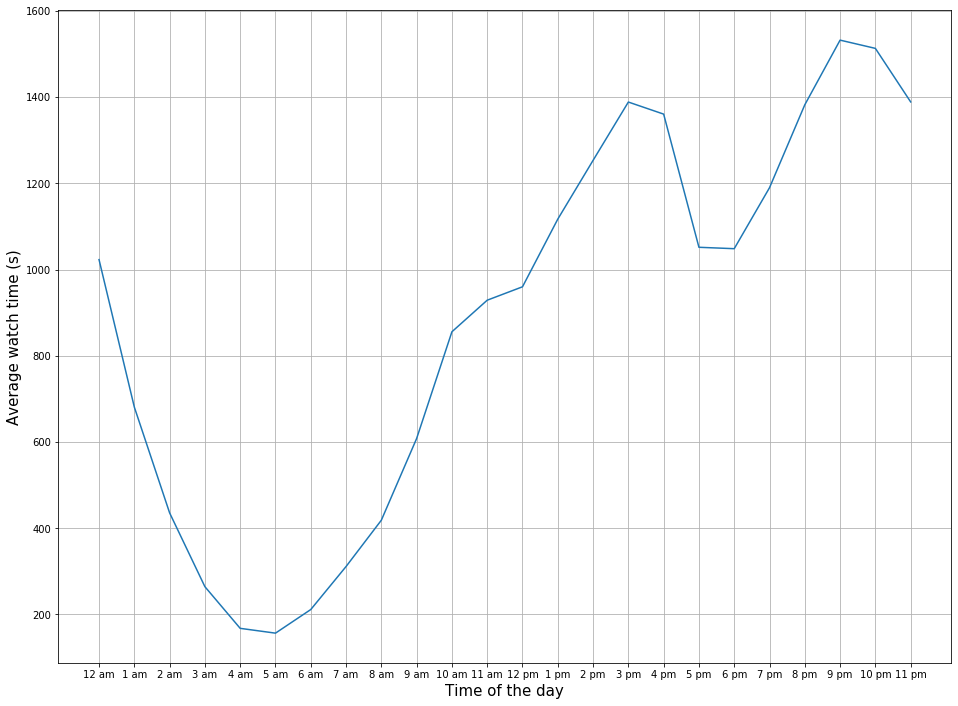

In [91]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(tod_df.loc[:, tod_df.columns!="segment"].columns, col_avg)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Average watch time (s)', fontsize=15)
# plt.axes.
plt.grid()
plt.show()

In [92]:
col_sum = []
for col in tod_df.loc[:, tod_df.columns!="segment"].columns:
    col_sum.append(tod_df[col].sum())

In [93]:

col_sum[21]

306409590.0

Higest watch time:  85113.78 hours at 9pm


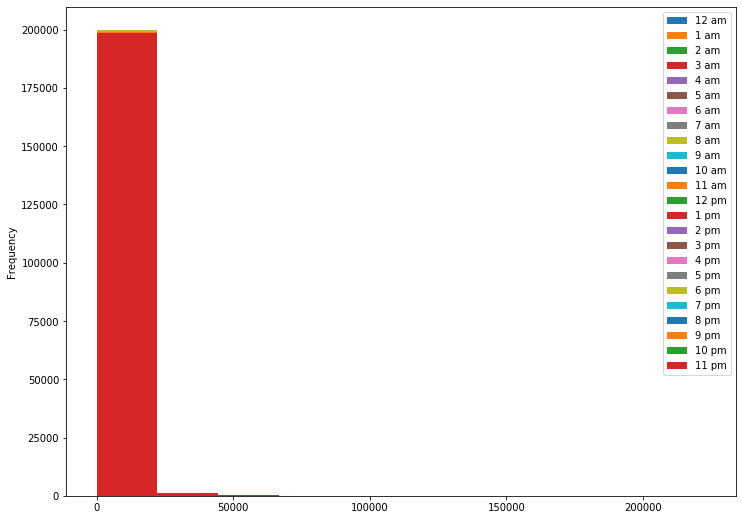

In [94]:
pm9_watchTime = round(col_sum[21]/3600,2)
print("Higest watch time: ",pm9_watchTime , "hours at 9pm")
tod_df.plot.hist(figsize=(12 ,9))

In [95]:
tod_col = tod_df.loc[:, tod_df.columns!="segment"].columns
tod_sum_dict = dict(zip(tod_col, col_sum))

sort_orders = sorted(tod_sum_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
    print(i[0], i[1])

9 pm 306409590.0
10 pm 302581202.0
11 pm 277743353.0
3 pm 277686418.0
8 pm 276416634.0
4 pm 272085810.0
2 pm 250631469.0
7 pm 237945039.0
1 pm 223367858.0
5 pm 210309459.0
6 pm 209657055.0
12 am 204587150.0
12 pm 191978735.0
11 am 185759239.0
10 am 171111325.0
1 am 136176829.0
9 am 121593356.0
2 am 87101759.0
8 am 83690084.0
7 am 62206711.0
3 am 52855371.0
6 am 42253037.0
4 am 33527682.0
5 am 31299643.0


Let us consider the top 5 most watched hours of the day

Also, we plot the distribution of average watch times over the 24 hours for negative and positive segments separately

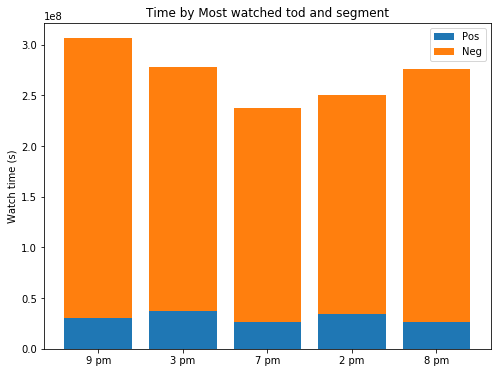

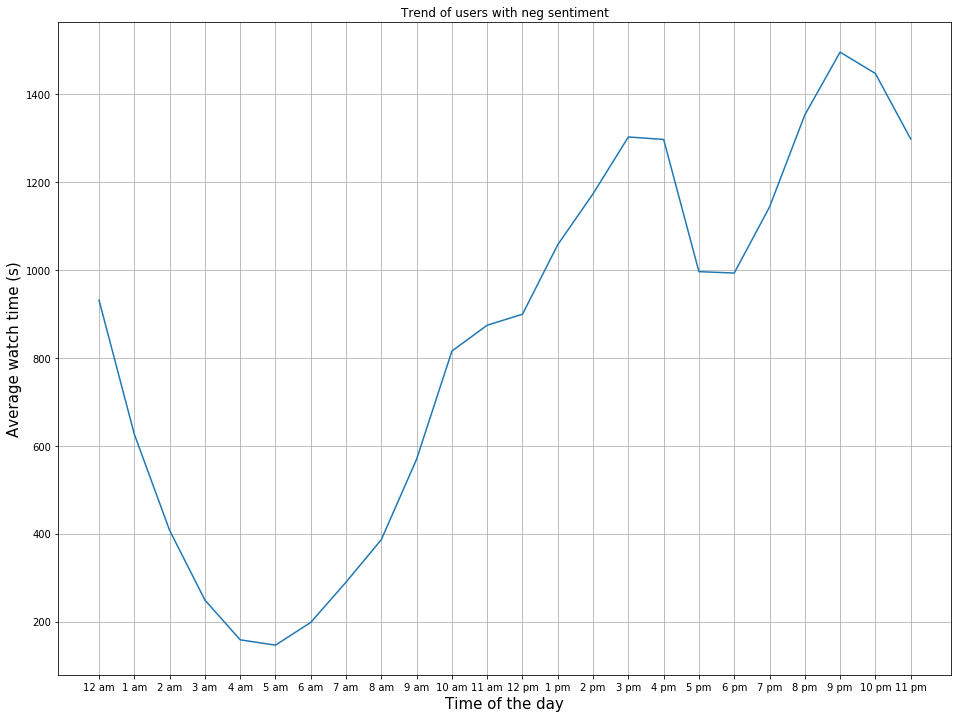

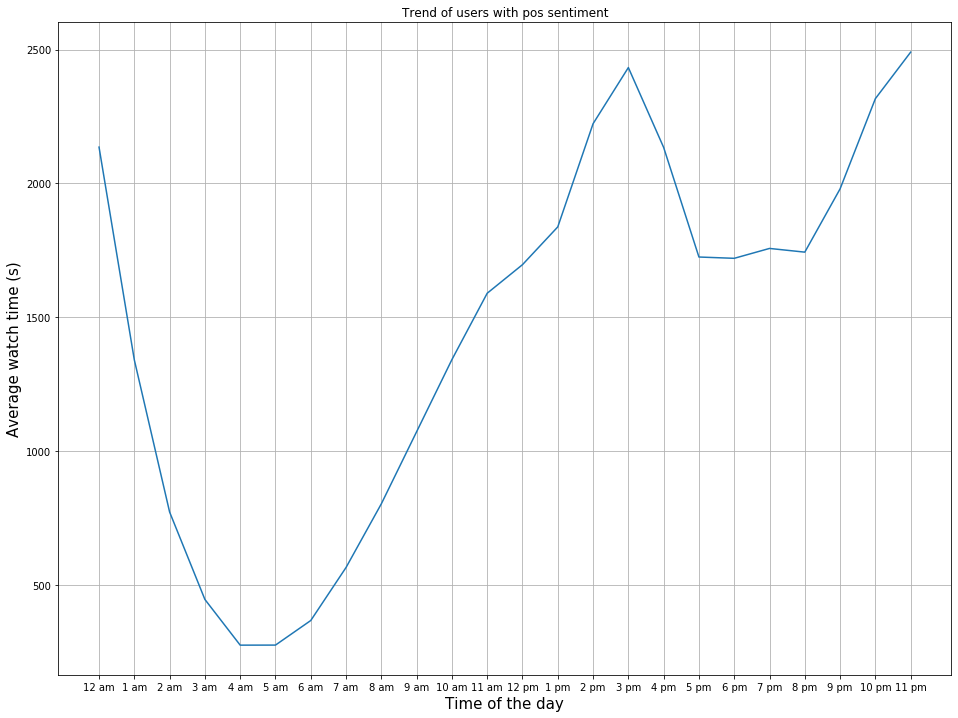

In [96]:
tod_df.shape
tod_df.head()

labels = ["9 pm", "3 pm", "7 pm", "2 pm", "8 pm"]
neg_watchtime = []
pos_watchtime = []
g = tod_df.groupby('segment')
for col in labels:
  neg_watchtime.append(g.apply(lambda x: x[x['segment'] == 'neg'][col].sum()))
  pos_watchtime.append(g.apply(lambda x: x[x['segment'] == 'pos'][col].sum()))
# print(neg_watchtime)
# print(pos_watchtime)
neg_watchtime_values = []
pos_watchtime_values = []
for i in range(0,5):
  neg_watchtime_values.append(neg_watchtime[i].neg)
  pos_watchtime_values.append(pos_watchtime[i].pos)
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(labels, pos_watchtime_values, label='Pos')
ax.bar(labels, neg_watchtime_values, bottom=pos_watchtime_values,label='Neg')

ax.set_ylabel('Watch time (s)')
ax.set_title('Time by Most watched tod and segment')
ax.legend()

plt.show()
tod_df_neg = tod_df.drop(tod_df[tod_df['segment'] != 'neg'].index, inplace = False)
tod_df_pos = tod_df.drop(tod_df[tod_df['segment'] != 'pos'].index, inplace = False)

tod_df_neg.drop("segment", axis=1, inplace=True)
tod_df_pos.drop("segment", axis=1, inplace=True)
col_avg_neg = []
for col in tod_df_neg.columns:
  col_avg_neg.append(tod_df_neg[col].mean())

fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(tod_df_neg.columns, col_avg_neg)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Average watch time (s)', fontsize=15)
plt.title("Trend of users with neg sentiment")
plt.grid()
plt.show()

col_avg_pos = []
for col in tod_df_pos.columns:
  col_avg_pos.append(tod_df_pos[col].mean())

fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(tod_df_pos.columns, col_avg_pos)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Average watch time (s)', fontsize=15)
plt.title("Trend of users with pos sentiment")
plt.grid()
plt.show()

#### Cities
Perform EDA on the `cities` dataframe

In [97]:
city_df = generate_df("cities")
print(city_df.shape)

(200000, 1358)


In [98]:
city_df["segment"] = df["segment"].values
city_df.head()

,delhi,mumbai,ahmedabad,navi mumbai,chennai,bangalore,krishnarajapura,hosur,gurgaon,nagari,...,fontaine,saint-nizier-du-moucherotte,orly,geromina,clifton,weehawken,deoli,oshawa,orebro,segment
user_id,,,,,,,,,,,,,,,,,,,,,
121672,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
121673,0.0,26989.0,56666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
121670,0.0,0.0,0.0,29400.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
121671,0.0,0.0,0.0,4005.0,77.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
121676,0.0,0.0,0.0,0.0,0.0,5135.0,529.0,2864.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos


In [99]:
pos = city_df[city_df["segment"]=="pos"]
pos = pos.drop(columns=["segment"])
top_cities_pos = pos.sum().sort_values(ascending=False)[:15]
top_cities_pos

mumbai         90360404.0
navi mumbai    71174999.0
bangalore      59519717.0
delhi          58570275.0
chennai        38851516.0
Unknown        27675649.0
hyderabad      27409944.0
gurgaon        25570661.0
new delhi      17825145.0
kolkata        12192322.0
karachi        11867040.0
pune           10100373.0
dhaka           8525912.0
ahmedabad       8148902.0
bengaluru       6263403.0
dtype: float64

In [100]:
neg = city_df[city_df["segment"]=="neg"]
neg = neg.drop(columns=["segment"])
top_cities_neg = neg.sum().sort_values(ascending=False)[:15]
top_cities_neg

navi mumbai    848245972.0
mumbai         550077551.0
delhi          422065042.0
bangalore      277127940.0
gurgaon        259084509.0
chennai        222200932.0
Unknown        186348199.0
hyderabad      144983825.0
kolkata         96833615.0
new delhi       81163428.0
pune            73537338.0
karachi         66108605.0
dhaka           56404999.0
ahmedabad       42925723.0
bengaluru       41543808.0
dtype: float64

Distribution of top cities for positive (red) and negative (green) segments

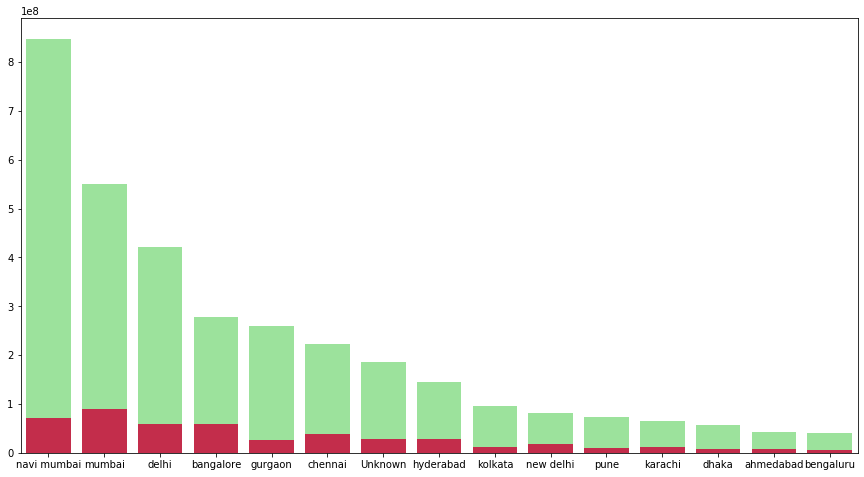

In [103]:
plt.figure(figsize=(15,8))
import matplotlib.patches as mpatches
pos_vals = [top_cities_pos[i] for i in top_cities_neg.keys()]
top = sns.barplot(top_cities_neg.keys(),top_cities_neg.values,color="lightgreen")
bot = sns.barplot(top_cities_neg.keys(),pos_vals,color="crimson")

# show the graph
plt.show()

In [105]:
city_df = city_df[["navi mumbai", "delhi", "mumbai", "bangalore", "gurgaon", "chennai", "kolkata", "new delhi", 
                   "pune", "bengaluru", "Unknown", "hyderabad", "karachi", "dhaka", "ahmedabad"]]

city_df.columns

Index(['navi mumbai', 'delhi', 'mumbai', 'bangalore', 'gurgaon', 'chennai',
       'kolkata', 'new delhi', 'pune', 'bengaluru', 'Unknown', 'hyderabad',
       'karachi', 'dhaka', 'ahmedabad'],
      dtype='object')

In [106]:
city_cnt = []
for row in df["cities"].values:
    row = row.split(",")
    city_cnt.append(len(row))
city_df["city_count"] = city_cnt

In [107]:
city_df.head()

,navi mumbai,delhi,mumbai,bangalore,gurgaon,chennai,kolkata,new delhi,pune,bengaluru,Unknown,hyderabad,karachi,dhaka,ahmedabad,city_count
user_id,,,,,,,,,,,,,,,,
121672,0.0,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
121673,0.0,0.0,26989.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56666.0,2
121670,29400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
121671,4005.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
121676,0.0,0.0,0.0,5135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Exploring how the distribution of city count varies between positive (red) and negative (green) segments

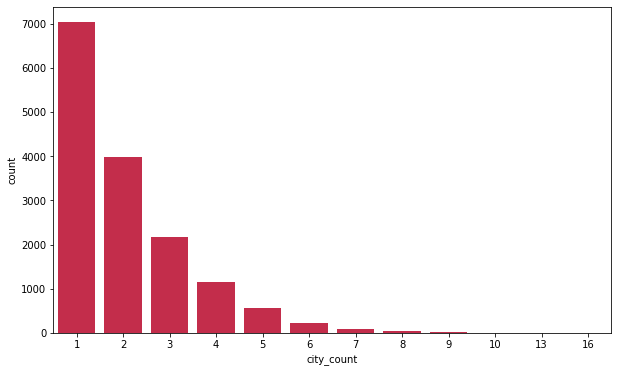

In [109]:
plt.figure(figsize=(10,6))
city_df["segment"] = df["segment"].values
pos = city_df[city_df["segment"]=="pos"]["city_count"]
sns.countplot(x=pos,color="crimson")

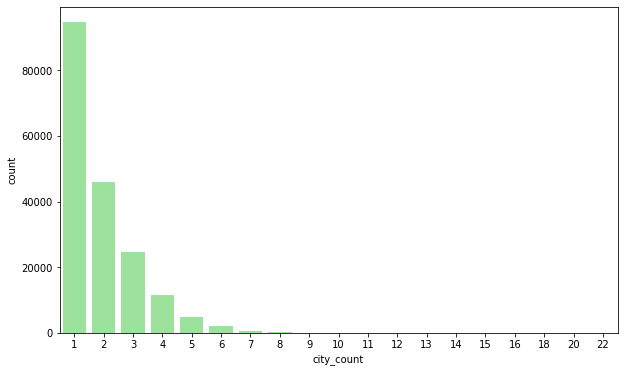

In [110]:
plt.figure(figsize=(10,6))
neg = city_df[city_df["segment"]=="neg"]["city_count"]
sns.countplot(x=neg,color="lightgreen")

Distribution of overall city count

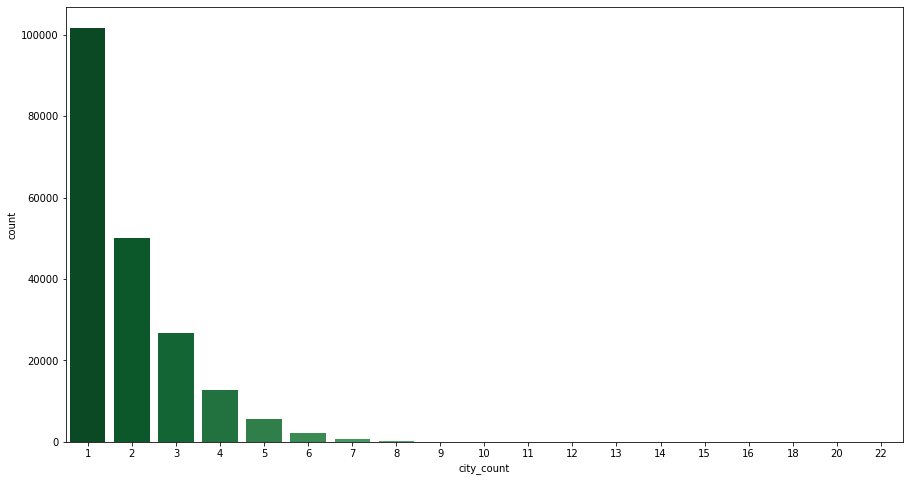

In [111]:
plt.figure(figsize=(15,8))
sns.countplot(x=city_df["city_count"],palette="Greens_r")

#### DOW

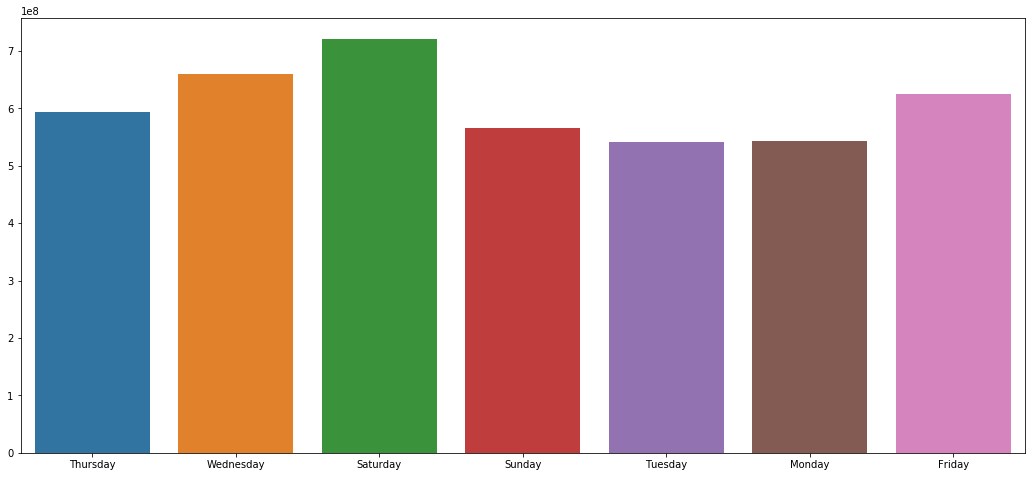

In [113]:
# Plotting the user watch times with respect to the days of the week
plt.figure(figsize=(18,8))
sns.barplot(dow_df.sum().keys(), dow_df.sum().values)

It can be seen that majority of the users used to watch content on Fridays, Saturdays and Wednesdays. 

#### Genres
Plotting the top ten genres

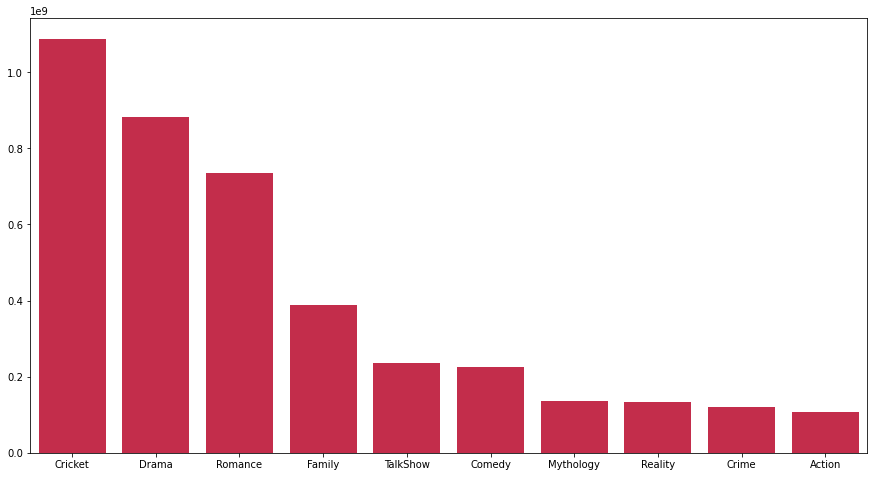

In [14]:
import seaborn as sns
plt.figure(figsize=(15, 8))
top = sns.barplot(genres_train_df.sum().sort_values().nlargest(10).keys(),genres_train_df.sum().sort_values().nlargest(10).values,color="crimson")


Cricket is the most watched genre on Hotstar followed by Drama and Romance

#### Same total watch time
An observation that was made was the total watch time for any user in `genres` is equal to total watch time in `tod` and the total watch time in `dow` and total watch time in `cities`. 

This verifies the correctness of the data.

In [114]:
duration = {"genres":[], "tod":[], "dow":[]}
for row in range(100):
    duration['genres'].append(genres.iloc[row, :].sum())

In [115]:
for row in range(100):
    duration['tod'].append(tod.iloc[row, :].sum())

In [116]:
for row in range(len(df.iloc[:100,:])):
    duration['dow'].append(dow.iloc[row, :].sum())

In [117]:
for i, j, k in zip(duration['genres'], duration['tod'], duration['dow']):
    print(i, "\t", j, "\t", k)

3554.0 	 3554.0 	 3554.0
83637.0 	 83635.0 	 83639.0
29398.0 	 29396.0 	 29396.0
4082.0 	 4082.0 	 4082.0
8529.0 	 8528.0 	 8528.0
5.0 	 5.0 	 5.0
29661.0 	 29661.0 	 29661.0
6655.0 	 6655.0 	 6655.0
30121.0 	 30120.0 	 30120.0
1080.0 	 1080.0 	 1080.0
17308.0 	 17305.0 	 17308.0
182475.0 	 182474.0 	 182473.0
2819.0 	 2819.0 	 2819.0
990.0 	 989.0 	 989.0
4675.0 	 4675.0 	 4675.0
68399.0 	 68393.0 	 68395.0
3810.0 	 3810.0 	 3810.0
24546.0 	 24543.0 	 24544.0
37.0 	 37.0 	 37.0
46435.0 	 46434.0 	 46435.0
1026.0 	 1026.0 	 1026.0
205506.0 	 205503.0 	 205507.0
10667.0 	 10667.0 	 10667.0
8528.0 	 8528.0 	 8528.0
4541.0 	 4540.0 	 4541.0
56244.0 	 56240.0 	 56241.0
16590.0 	 16588.0 	 16588.0
24394.0 	 24390.0 	 24391.0
28851.0 	 28851.0 	 28851.0
289349.0 	 289348.0 	 289348.0
2211.0 	 2210.0 	 2210.0
3193.0 	 3193.0 	 3193.0
18932.0 	 18932.0 	 18932.0
1689.0 	 1688.0 	 1688.0
10731.0 	 10730.0 	 10729.0
65201.0 	 65199.0 	 65200.0
21419.0 	 21417.0 	 21417.0
19290.0 	 19283.0 	 1928

As we can see from the above result, the total watch time of every user for all genres is equal to the total watch time for all days of week and the total time for all times of the day.
Hence instead of using the concateated dataset having all the columns from `genres`, `dow`, `tod`, we choose to use only the columns in `tod` since it has the least no of columns and the dataset looks like the one below

In [118]:
dow_df = pd.read_csv("./data/dow_target.csv")
dow_df.set_index(genres_df.index,inplace=True)
dow_df.head()

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,segment
user_id,,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,0
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,0
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,0
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,0
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,1


Lets add some simple additional features to this dataset. A rigorous feature engineering is done later

#### Feature 1: Total genres for every user
Adding a new columnn that will represent the total number of genres watched by every user

In [119]:
genres_df.head()

,Drama,Cricket,Wildlife,Family,Crime,Romance,Action,Comedy,LiveTV,TalkShow,...,Table Tennis,Documentary,Tennis,Volleyball,Athletics,FormulaE,NA,Boxing,Swimming,IndiaVsSa
user_id,,,,,,,,,,,,,,,,,,,,,
121672,6.0,3469.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121673,48949.0,0.0,0.0,9927.0,1901.0,16571.0,2064.0,4225.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121670,20873.0,5715.0,0.0,2777.0,0.0,0.0,14.0,15.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121671,122.0,3883.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8529.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
dow_df["Total_genres"] = 35 - genres_df.eq(0).sum(axis=1)

In [121]:
dow_df.head()

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,segment,Total_genres
user_id,,,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,0,3
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,0,6
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,0,6
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,0,3
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,1,1


#### Feature 2: Average watch time for every user
Adding a new column for the average watch time for each user

In [122]:
# Avg watch time per day
dow = pd.read_csv("./data/dow.csv")
dow.set_index(genres_df.index,inplace=True)
dow.head()

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday
user_id,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0


In [123]:
dow_df["Average_watch_time_per_day"] = dow.sum(axis=1)/7

In [124]:
dow_df.head()

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,segment,Total_genres,Average_watch_time_per_day
user_id,,,,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,0,3,507.714286
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,0,6,11948.428571
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,0,6,4199.428571
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,0,3,583.142857
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,1,1,1218.285714


#### Feature 3: Watch_time_freq
Since the average watch time is a continuous column, let us categorize it by splitting it into three categories as per the value for the watch time

In [125]:
q1 = dow_df['Average_watch_time_per_day'].quantile(0.25)
q3 = dow_df['Average_watch_time_per_day'].quantile(0.75)
low_intent = q1 - 1.5*(q3-q1)
high_intent = q3 + 1.5*(q3-q1)
frequent_users = q3 - q1

def frequent_users(x):
    if(x<=q3 and x>=q1):
        return "frequent"
    elif x<q1:
        return "less-frequent"
    elif x>q3:
        return "more-frequent"

dow_df["Watch_time_freq"] = dow_df['Average_watch_time_per_day'].apply(frequent_users)
dow_df.drop("Average_watch_time_per_day", axis=1, inplace=True)


In [126]:
dow_df.head()

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,segment,Total_genres,Watch_time_freq
user_id,,,,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,0,3,frequent
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,0,6,more-frequent
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,0,6,more-frequent
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,0,3,frequent
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,1,1,frequent


#### Feature 4: Total cities
Adding a new column for all the cities the user has watched content in

In [127]:
dow_df['Total_cities'] = 1358-cities_df.eq(0).sum(axis=1)
dow_df.head()

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,segment,Total_genres,Watch_time_freq,Total_cities
user_id,,,,,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,0,3,frequent,2
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,0,6,more-frequent,2
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,0,6,more-frequent,1
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,0,3,frequent,2
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,1,1,frequent,3


In [128]:
dow_df['Total_hours'] = 24-tod_df.eq(0).sum(axis=1)
dow_df.head()

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,segment,Total_genres,Watch_time_freq,Total_cities,Total_hours
user_id,,,,,,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,0,3,frequent,2,3
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,0,6,more-frequent,2,18
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,0,6,more-frequent,1,16
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,0,3,frequent,2,4
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,1,1,frequent,3,6


In [129]:
dow_df['Total_days'] = 7-dow.eq(0).sum(axis=1)
dow_df.head()

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,segment,Total_genres,Watch_time_freq,Total_cities,Total_hours,Total_days
user_id,,,,,,,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,0,3,frequent,2,3,3
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,0,6,more-frequent,2,18,7
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,0,6,more-frequent,1,16,7
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,0,3,frequent,2,4,3
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,1,1,frequent,3,6,2


In [130]:
# One hot encoding
dow_df = pd.get_dummies(dow_df)

In [131]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split

# Splitting the features and target
X, y = dow_df.loc[:, dow_df.columns!="segment"], dow_df.loc[:, dow_df.columns=="segment"]

# Separating the training and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialising a SMOTE() instance and fitting on the train data
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

#### Fitting a Decision Tree Model and analysing the performance on the Validation data

In [132]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_oversampled, y_train_oversampled)

print("On Validation data, ROC-AUC using Decision Tree is: ",roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

On Validation data, ROC-AUC using Decision Tree is:  0.542029261962765


#### Fitting a Logistic Regrression Model and analysing the performance on the Validation data

In [133]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_oversampled, y_train_oversampled)
print("On Validation data, ROC-AUC Logistic Regression is: ",roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


On Validation data, ROC-AUC Logistic Regression is:  0.6281447638204152


#### Fitting an XGBoost Model and analysing the performance on the Validation data

In [134]:
from xgboost import XGBClassifier as xgb

model = xgb()
model.fit(X_train_oversampled, y_train_oversampled)
print("On Validation data, ROC-AUC using XGBoost is: ",roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

On Validation data, ROC-AUC using XGBoost is:  0.6430463796515113


#### Fitting a Random Forest Model and analysing the performance on the Validation data

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_oversampled, y_train_oversampled)

print("On Validation data, ROC-AUC using RandomForestClassifier is: ",roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

On Validation data, ROC-AUC using RandomForestClassifier is:  0.6286409875921082


It looks like on reducing the features by this method does not result in a good `auc_roc_score`. Hence we perform an extensive feature engineering on the original features

## Feature Engineering on the train data

#### Genres
For the genres column, we perform the below preprocessing
- We have combined all the sports based genres into one genre `Sport`
- Since `Cricket` is the most watched genre on Hotstar, instead of adding it into `Sport`, we shall keep it as a separate feature

In [69]:
genres_df["Sport"] = genres_df["Sport"] + genres_df["Badminton"] + genres_df["Hockey"] + genres_df["Kabaddi"] + genres_df["Formula1"] + genres_df["Tennis"] + genres_df["Athletics"] + genres_df["Table Tennis"] + genres_df["FormulaE"] + genres_df["Volleyball"] + genres_df["Boxing"] + genres_df["Swimming"]

genres_df["Cricket"] = genres_df["Cricket"] + genres_df["IndiaVsSa"]

genres_df = genres_df.drop(columns = ['Tennis', 'Volleyball', 'Athletics', 
                                   'FormulaE', 'NA', 'Boxing', 'Swimming',
                                   'IndiaVsSa', 'Hockey', 'Kabaddi', 
                                   'Table Tennis', 'Formula1', 'Badminton'])
genres_df["genre_count"] = len(genres_df.columns) - genres_df.eq(0).sum(axis=1)
genres_df.head()

,Drama,Cricket,Wildlife,Family,Crime,Romance,Action,Comedy,LiveTV,TalkShow,...,Sport,Awards,Travel,Teen,Mythology,Kids,Science,Horror,Documentary,genre_count
user_id,,,,,,,,,,,,,,,,,,,,,
121672,6.0,3469.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
121673,48949.0,0.0,0.0,9927.0,1901.0,16571.0,2064.0,4225.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
121670,20873.0,5715.0,0.0,2777.0,0.0,0.0,14.0,15.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
121671,122.0,3883.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8529.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [70]:
genres_df.shape

(200000, 23)

#### TOD
For the `tod` column, we perform the below preprocessing
- We add a new column for the count of the total number of days the user has watched on the platform
- We shall consider only the top times of the day as per the EDA, that have recorded maximum user watch times

In [71]:
tod_df["tod_count"] = len(tod_df.columns) - tod_df.eq(0).sum(axis=1)
tod_df = tod_df[["9 pm", "10 pm", "11 pm", "3 pm", "8 pm", "tod_count"]]


In [77]:
tod_df

,9 pm,10 pm,11 pm,3 pm,8 pm,tod_count
user_id,,,,,,
121672,1862.0,0.0,0.0,0.0,0.0,3
121673,9360.0,304.0,2988.0,967.0,4608.0,18
121670,3430.0,2219.0,2111.0,1640.0,3802.0,16
121671,0.0,0.0,0.0,1800.0,0.0,4
121676,1257.0,4930.0,538.0,0.0,529.0,6
...,...,...,...,...,...,...
126324,2327.0,40.0,0.0,17.0,0.0,7
126327,2128.0,0.0,0.0,279.0,526.0,10
126326,1269.0,0.0,0.0,387.0,1120.0,16


#### Cities
For the Cities column, we have performed the below preprocessing
- We consider only the top cities as per the EDA that have recorded the maximum user watch times. 
- We have added a new column for the count of the total number of cities

In [73]:
cities_df = cities_df[["navi mumbai", "delhi", "mumbai", "bangalore", "gurgaon", "chennai", "kolkata", "new delhi", 
                   "pune", "bengaluru", "Unknown", "hyderabad", "karachi", "dhaka", "ahmedabad"]]


cities_cnt = []
for row in df["cities"].values:
    row = row.split(",")
    cities_cnt.append(len(row))
cities_df["city_count"] = cities_cnt

In [78]:
cities_df

,navi mumbai,delhi,mumbai,bangalore,gurgaon,chennai,kolkata,new delhi,pune,bengaluru,Unknown,hyderabad,karachi,dhaka,ahmedabad,city_count
user_id,,,,,,,,,,,,,,,,
121672,0.0,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
121673,0.0,0.0,26989.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56666.0,2
121670,29400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
121671,4005.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
121676,0.0,0.0,0.0,5135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126324,0.0,0.0,1548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
126327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
126326,0.0,0.0,0.0,0.0,0.0,0.0,25436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### DOW
For the day of the week, we have
- Added a new feature that represents the total watch time of the user on the platform
- The count for the number of days the user has watched on the platform

In [79]:
dow_df["total_watch_time"] = dow_df["Sunday"] + dow_df["Monday"] + dow_df["Tuesday"] + dow_df["Wednesday"] + dow_df["Thursday"] + dow_df["Friday"] + dow_df["Saturday"]

dow_df["dow_count"] = len(dow_df.columns) - dow_df.eq(0).sum(axis=1)

dow_df = change_column_position(dow_df, ["total_watch_time"], [7])
dow_df

,Thursday,Wednesday,Saturday,Sunday,Tuesday,Monday,Friday,total_watch_time,segment,Total_genres,Total_cities,Total_hours,Total_days,Watch_time_freq_frequent,Watch_time_freq_less-frequent,Watch_time_freq_more-frequent,dow_count
user_id,,,,,,,,,,,,,,,,,
121672,482.0,3008.0,64.0,0.0,0.0,0.0,0.0,3554.0,0,3,2,3,3,1,0,0,10
121673,9237.0,8503.0,25094.0,3257.0,9162.0,12893.0,15493.0,83639.0,0,6,2,18,7,0,0,1,14
121670,7338.0,6641.0,2218.0,40.0,2700.0,4659.0,5800.0,29396.0,0,6,1,16,7,0,0,1,14
121671,122.0,0.0,0.0,77.0,0.0,3883.0,0.0,4082.0,0,3,2,4,3,1,0,0,10
121676,0.0,0.0,0.0,6150.0,2378.0,0.0,0.0,8528.0,1,1,3,6,2,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126324,40.0,220.0,2472.0,1108.0,0.0,0.0,0.0,3840.0,0,2,2,7,4,1,0,0,11
126327,2317.0,0.0,3688.0,948.0,0.0,0.0,0.0,6953.0,0,3,2,10,3,1,0,0,10
126326,3875.0,4274.0,3284.0,2562.0,3153.0,5009.0,3278.0,25435.0,0,2,1,16,7,0,0,1,14


### Combining all the preprocessing operations into modular functions

We have combined all the preprocessing that has been performed on the train data into separate functions as shown below

In [3]:
def load_train_data():
    '''
        Loads the train data json file
    '''
    with open(r"./data/train_data.json", "r") as f:
        data = json.load(f)
    return data


def generate_train_df(column_name):
    '''
        Takes as input one of the column names - "genres", "tod", "dow", "cities" in the train data
        and returns the dataframe for that column.
        
        Parameters:
        column_name - String
        
    '''
    data = load_train_data()
    json_data = []
    for key in list(data.keys()):
        try:
            row = data[key].get(column_name)
            df_dict = {i.split(":")[0]:int(i.split(":")[1]) for i in row.split(",")}
            json_data.append(df_dict)
        except:
            continue
    df = json_normalize(json_data)
    df.fillna(0, inplace=True)

    index = [int(key.split("-")[1]) for key in data.keys()]
    df["user_id"] = index
    df.set_index("user_id",inplace=True)
    return df


def load_genres_train():
    '''
        Loads the dataframe for genres column in train data, performs the feature engineering and returns 
        the final dataframe
    '''
    genres_train_df = generate_train_df("genres")
            
    
    genres_train_df["Sport"] = genres_train_df["Sport"] + genres_train_df["Badminton"] + genres_train_df["Hockey"] + genres_train_df["Kabaddi"] + genres_train_df["Formula1"] + genres_train_df["Tennis"] + genres_train_df["Athletics"] + genres_train_df["Table Tennis"] + genres_train_df["FormulaE"] + genres_train_df["Volleyball"] + genres_train_df["Boxing"] + genres_train_df["Swimming"]

    genres_train_df["Cricket"] = genres_train_df["Cricket"] + genres_train_df["IndiaVsSa"]

    genres_train_df = genres_train_df.drop(columns = ['Tennis', 'Volleyball', 'Athletics', 
                                       'FormulaE', 'NA', 'Boxing', 'Swimming',
                                       'IndiaVsSa', 'Hockey', 'Kabaddi', 
                                       'Table Tennis', 'Formula1', 'Badminton'])
    
    genres_train_df["genre_count"] = len(genres_train_df.columns) - genres_train_df.eq(0).sum(axis=1)
    
    return genres_train_df


def load_cities_train():
    '''
        Loads the dataframe for cities column in train data, performs the feature engineering and returns 
        the final dataframe
    '''
    df = pd.read_json("./data/train_data.json").T
    cities_train_df = generate_train_df("cities")
            
    cities_train_df = cities_train_df[["navi mumbai", "delhi", "mumbai", "bangalore", "gurgaon", "chennai", "kolkata", "new delhi", 
                   "pune", "bengaluru", "Unknown", "hyderabad", "karachi", "dhaka", "ahmedabad"]]


    cities_cnt = []
    for row in df["cities"].values:
        row = row.split(",")
        cities_cnt.append(len(row))
    cities_train_df["city_count"] = cities_cnt
    
    return cities_train_df


def load_dow_train():
    '''
        Loads the dataframe for "dow" column in the train data, performs the feature engineering and returns 
        the final dataframe
    '''
    dow_train_df = generate_train_df("dow")
    dow_train_df.rename(columns={"1":"Sunday", "2":"Monday", "3":"Tuesday", "4":"Wednesday", "5":"Thursday", 
             "6":"Friday", "7":"Saturday"}, inplace=True)
            
    dow_train_df["total_watch_time"] = dow_train_df["Sunday"] + dow_train_df["Monday"] + dow_train_df["Tuesday"] + dow_train_df["Wednesday"] + dow_train_df["Thursday"] + dow_train_df["Friday"] + dow_train_df["Saturday"]

    dow_train_df["dow_count"] = len(dow_train_df.columns) - dow_train_df.eq(0).sum(axis=1)

    dow_train_df = change_column_position(dow_train_df, ["total_watch_time"], [7])
    
    return dow_train_df



def load_tod_train():
    '''
        Loads the dataframe for "tod" column in the train data, performs the feature engineering and returns 
        the final dataframe
    '''
    
    tod_train_df = generate_train_df("tod")
    tod_columns = tod_train_df.columns.tolist()

    for ind in range(len(tod_columns)):
        if int(tod_columns[ind])==0:
            tod_columns[ind] = "12 am";
        elif int(tod_columns[ind])==12:
            tod_columns[ind] = "12 pm"
        elif int(tod_columns[ind])<12:
            tod_columns[ind]=tod_columns[ind]+" am"
        elif int(tod_columns[ind])<24:
            tod_columns[ind] = str(int(tod_columns[ind])-12)+" pm"

    tod_train_df.columns = tod_columns
    
    tod_train_df["tod_count"] = len(tod_train_df.columns) - tod_train_df.eq(0).sum(axis=1)
    tod_train_df = tod_train_df[["9 pm", "10 pm", "11 pm", "3 pm", "8 pm", "tod_count"]]

    
    return tod_train_df


def load_titles_train():
    '''
        Loads the dataframe for "titles" column in the train data, performs the feature engineering and returns 
        the final dataframe
    '''
    
    df_train = pd.read_json("./data/train_data.json").T
    top_shows = ['Ishqbaaaz', 'Koffee With Karan', 'Yeh Rishta Kya Kehlata Hai', 'Ye Hai Mohabbatein', 
          'Chandra Nandni', 'Pardes Mein Hai Mera Dil', 'Savdhaan India', 'Khoka Babu', 
          'Naamkarann', 'Dil Boley Oberoi', 'MS Dhoni', 'Dil Hai Hindustani', 
          'Devon Ke Dev___ Mahadev', 'Iss Pyar Ko Kya Naam Doon', 'Jana Na Dil Se Door', 'Tanhaiyan',
          'Saath Nibhaana Saathiya',  'Mere Angne Mein', 'Nach Baliye',  'Ghulaam',  
          'Suhani Si Ek Ladki', 'Savdhaan India', 'Koi Laut Ke Aaya Hai', 'Sarabhai Vs Sarabhai']
    
    title_cnt = []
    title_arr = []
    for row in df_train["titles"].values:
        row = row.split(",")
        x = dict()
        title_cnt.append(len(row))
        for s in row:
            if s.split(":")[0] in top_shows:
                try:
                    x[s.split(":")[0]] = int(s.split(":")[-1])
                except:
                    x[s.split(":")[0]] = 0
        title_arr.append(x)

    title_df = json_normalize(title_arr, max_level=1)
    title_df = title_df.fillna(0)
    title_df["title_count"] = title_cnt
    title_df["user_id"] = genres_train_df.index
    title_df = title_df.set_index("user_id")
    for col in title_df.columns:
        title_df[col] = title_df[col].apply(lambda x:int(x))
            
    return title_df
    


In [ ]:

genres_train_df = load_genres_train()

cities_train_df = load_cities_train() 

dow_train_df = load_dow_train()

titles_train_df = load_titles_train()

tod_train_df = load_tod_train()

In [ ]:
# The below function concatenates all the preprocessed dataframes into a single dataframe
def prepare_preprocessed_train_df():
    '''
        Concatenates all the preprocessed dataframes into a single dataframe.
    '''
    
    train_df_preprocessed = pd.concat([genres_train_df, dow_train_df, tod_train_df, cities_train_df, titles_train_df], axis=1)

    return train_df_preprocessed

df_train = prepare_preprocessed_train_df()

In [14]:
df_train.head()

,Drama,Cricket,Wildlife,Family,Crime,Romance,Action,Comedy,LiveTV,TalkShow,...,Savdhaan India,Saath Nibhaana Saathiya,Koi Laut Ke Aaya Hai,Dil Hai Hindustani,Nach Baliye,Khoka Babu,Devon Ke Dev___ Mahadev,Sarabhai Vs Sarabhai,Iss Pyar Ko Kya Naam Doon,title_count
user_id,,,,,,,,,,,,,,,,,,,,,
121672,6.0,3469.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,9
121673,48949.0,0.0,0.0,9927.0,1901.0,16571.0,2064.0,4225.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,33
121670,20873.0,5715.0,0.0,2777.0,0.0,0.0,14.0,15.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,17
121671,122.0,3883.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3
121676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8529.0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
df_train = pd.read_json(r"./data/train_df_preprocessed.json")
df_train.head()

,Drama,Cricket,Wildlife,Family,Crime,Romance,Action,Comedy,LiveTV,TalkShow,...,Saath Nibhaana Saathiya,Koi Laut Ke Aaya Hai,Dil Hai Hindustani,Nach Baliye,Khoka Babu,Devon Ke Dev___ Mahadev,Sarabhai Vs Sarabhai,Iss Pyar Ko Kya Naam Doon,title_count,segment
121672,6,3469,79,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0
121673,48949,0,0,9927,1901,16571,2064,4225,0,0,...,0,0,0,0,0,0,0,0,33,0
121670,20873,5715,0,2777,0,0,14,15,4,0,...,0,0,0,0,0,0,0,0,17,0
121671,122,3883,0,0,0,77,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
121676,0,0,0,0,0,0,0,0,0,8529,...,0,0,0,0,0,0,0,0,1,1


#### Splitting into training and validation and performing Sampling

As our dataset is heavily imbalanced, we need to ensure that our model gets enough examples from both classes to learn the distinguishable patterns. A common technique to tackle this is to oversample the minority class and undersample the majority class. We employ SMOTE (Synthetic Minority Over-sampling Technique) to generate new samples of the minority class and randomly undersampling the majority class.

In [76]:
# Separating the features and target 
X, y = df_train.loc[:, df_train.columns!="segment"], df_train.loc[:, df_train.columns=="segment"]


# Splitting into training and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24, stratify=y)


# Applying SMOTE on training data and oversampling the underrepresnted class
over = SMOTE(sampling_strategy=0.2)
X_train, y_train = over.fit_resample(X_train, y_train)
# minority (pos) : majority (neg) = 20 : 100

# Applying RandomUnderSampler on majority class
under = RandomUnderSampler(sampling_strategy=0.5)
X_train_oversampled, y_train_oversampled = under.fit_resample(X_train, y_train)
# minority (pos) : majority (neg) = 20 : 50

### Model Building
Now we come to the stage of applying Machine Learning models on our data. For the sake of simplicity, we have saved the models as a `.pkl`(pickle) file. So instead of training the model again, we can directly load it and test on test data

Fitting a Decision Tree Model

In [102]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_oversampled, y_train_oversampled)

print(roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

0.6204914297313266


In [169]:
import pickle
pickle.dump(dt, open("dt_model.pkl", "wb"))
pickle.load(open("model_name.pkl", "rb")).predict_proba(X_test)[:,1]

Fitting a Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_oversampled, y_train_oversampled)
print("On Validation data, ROC-AUC is: ",roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

On Validation data, ROC-AUC is:  0.7802985232121884


In [167]:
import pickle
pickle.dump(lr, open("lr_model.pkl", "wb"))
pickle.load(open("model_name.pkl", "rb")).predict_proba(X_test)[:,1]

Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_oversampled, y_train_oversampled)
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

0.8068723327083704


In [168]:
import pickle
pickle.dump(rf, open("rf_model.pkl", "wb"))
pickle.load(open("model_name.pkl", "rb")).predict_proba(X_test)[:,1]

XGBoost

In [39]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
                        n_estimators=500,
                        gamma=1, 
                        learning_rate=.09,
                        max_depth=6,
                        colsample_bytree=1,
                        subsample=.8,
                        tree_method="exact",
                        objective="binary:logistic",
                        min_child_weight= 2,
                        scale_pos_weight=1.1
                        )
      
model_xgb.fit(X_train, y_train, eval_metric='logloss', verbose = True, eval_set = [(X_test, y_test)], early_stopping_rounds=50)

y_pred = model_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, classification_report
print("F1-score: ", f1_score( y_pred, y_test))
print("Accuracy: ", accuracy_score( y_pred, y_test))
print("ROC-AUC: ", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1]))
print(classification_report( y_pred, y_test))

(200000, 78)
[0]	validation_0-logloss:0.65255
[1]	validation_0-logloss:0.61817
[2]	validation_0-logloss:0.58713
[3]	validation_0-logloss:0.56015
[4]	validation_0-logloss:0.53706
[5]	validation_0-logloss:0.51633
[6]	validation_0-logloss:0.49755
[7]	validation_0-logloss:0.48218
[8]	validation_0-logloss:0.46701
[9]	validation_0-logloss:0.45254
[10]	validation_0-logloss:0.44068
[11]	validation_0-logloss:0.43076
[12]	validation_0-logloss:0.42074
[13]	validation_0-logloss:0.41169
[14]	validation_0-logloss:0.40311
[15]	validation_0-logloss:0.39590
[16]	validation_0-logloss:0.38896
[17]	validation_0-logloss:0.38272
[18]	validation_0-logloss:0.37632
[19]	validation_0-logloss:0.37080
[20]	validation_0-logloss:0.36589
[21]	validation_0-logloss:0.36084
[22]	validation_0-logloss:0.35687
[23]	validation_0-logloss:0.35334
[24]	validation_0-logloss:0.34931
[25]	validation_0-logloss:0.34568
[26]	validation_0-logloss:0.34247
[27]	validation_0-logloss:0.33903
[28]	validation_0-logloss:0.33622
[29]	valida

In [163]:
import pickle
pickle.dump(model_xgb, open("model_xgb.pkl", "wb"))
pickle.load(open("model_xgb.pkl", "rb")).predict_proba(X_test)[:,1]

### Hyperparameter Tuning

#### Grid Search using Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# lr = LogisticRegression(class_weight={0:0.05, 1:0.95})
lr = LogisticRegression()

p1 = ['liblinear', 'newton-cg', 'lbfgs']
p2 = ["l2"]
p3 = [10, 1.0, 0.1, 0.01]

lr.fit(X_train_oversampled, y_train_oversampled)
# define grid search
grid_search = GridSearchCV(estimator=lr, param_grid={"solver":p1,"penalty":p2,"C":p3}, n_jobs=-1, cv=StratifiedKFold(n_splits=10))
grid_search.fit(X_train_oversampled, y_train_oversampled)
print(roc_auc_score(y_test, grid_search.predict_proba(X_test)[:,1]))

0.7802498894656615


In [164]:
import pickle
pickle.dump(grid_search, open("grid_search_lr_model.pkl", "wb"))
pickle.load(open("grid_search_le_model.pkl", "rb")).predict_proba(X_test)[:,1]

#### Grid Search using Decision Tree

In [111]:
decsionTree = DecisionTreeClassifier()

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'splitter' : ["best"],
}

decsionTree.fit(X_train_oversampled, y_train_oversampled)
# define grid search
grid_search_dt = GridSearchCV(estimator=decsionTree, param_grid=params, n_jobs=-1, cv=StratifiedKFold(n_splits=10))
grid_search_dt.fit(X_train_oversampled, y_train_oversampled)
print(roc_auc_score(y_test, grid_search_dt.predict_proba(X_test)[:,1]))
print(grid_search_dt.best_params_)

0.6260385748776106
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'random_state': 42, 'splitter': 'best'}


In [78]:
import pickle
# pickle.dump(grid_search_dt, open("grid_search_dt_model.pkl", "wb"))

print(roc_auc_score(y_test, pickle.load(open(r"./models/grid_search_dt_model.pkl", "rb")).predict_proba(X_test)[:,1]))

0.6682559225480537


#### Grid Search Using Random Forest

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 150, 200]
}

rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=10), n_jobs = -1, verbose = 2)

rf_grid.fit(X_train_oversampled, y_train_oversampled)

print(roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:,1]))
print(rf_grid.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.6364664687376691
{'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [80]:
import pickle

pickle.dump(grid_search_dt, open("grid_search_dt_model.pkl", "wb"))

print(roc_auc_score(y_test, pickle.load(open(r"./models/rf_grid_model.pkl", "rb")).predict_proba(X_test)[:,1]))

0.8056630997604791


#### Grid Search using XGBClassifier

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    gamma=1, 
    colsample_bytree=1,
    subsample=.8,
    tree_method="exact",
    min_child_weight= 2,
    scale_pos_weight=1.1
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [100,200,500,800],
    'learning_rate': [0.1, 0.01, 0.05,0.09]
}

grid_search_xgb = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1_score',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search_xgb.fit(X_train_oversampled, y_train_oversampled)

In [162]:
import pickle
pickle.dump(grid_search_xgb, open("grid_search_xgb_model.pkl", "wb"))

In [81]:
print(roc_auc_score(y_test, pickle.load(open(r"./models/grid_search_xgb_model.pkl", "rb")).predict_proba(X_test)[:,1]))

0.8118766214702272


### Plotting the ROC_AUC curve for all the models without hyperparameter tuning

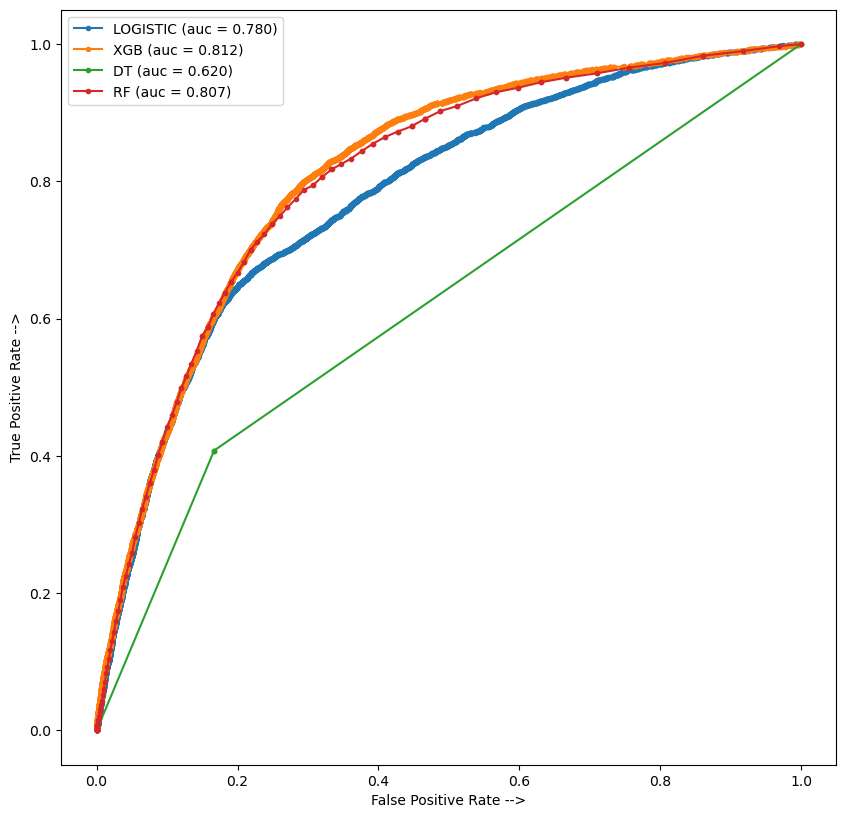

In [178]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='LOGISTIC (auc = %0.3f)' % auc_logistic)



xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, model_xgb.predict_proba(X_test)[:,1])
auc_xgb = auc(xgb_fpr, xgb_tpr)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB (auc = %0.3f)' % auc_xgb)


dt_fpr, dt_tpr, threshold = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
auc_dt = auc(dt_fpr, dt_tpr)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT (auc = %0.3f)' % auc_dt)


rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
auc_rf = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc = %0.3f)' % auc_rf)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### Plotting the ROC_AUC curve for all the models with hyperparameter tuning

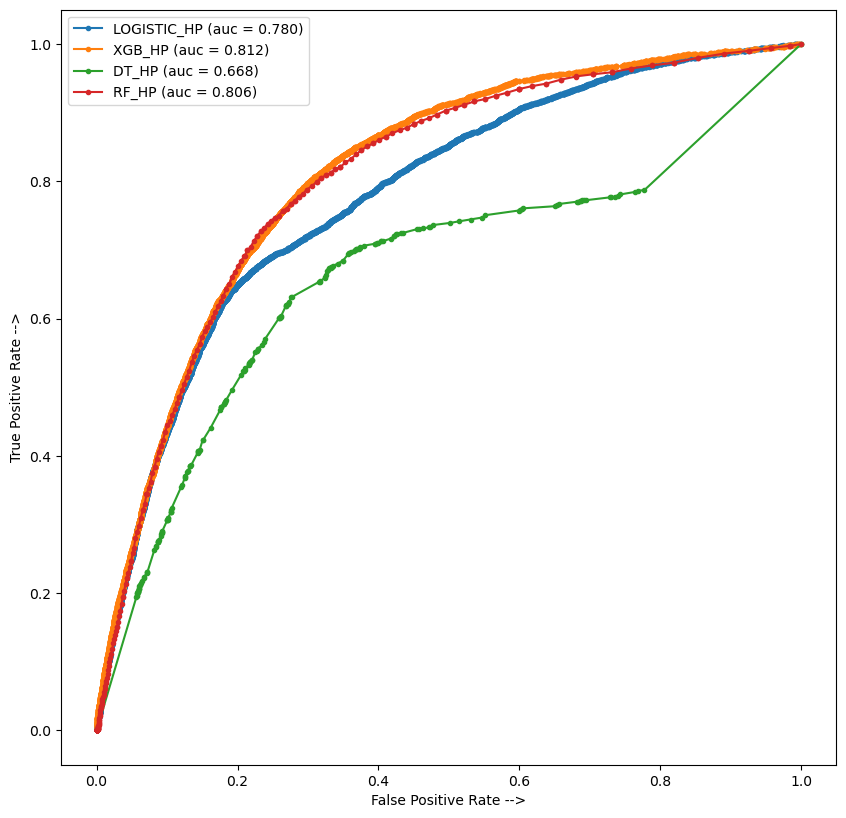

In [177]:
from sklearn.metrics import roc_curve, auc

logistic_fpr_hp, logistic_tpr_hp, threshold = roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
auc_logistic_hp = auc(logistic_fpr_hp, logistic_tpr_hp)
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(logistic_fpr_hp, logistic_tpr_hp, marker='.', label='LOGISTIC_HP (auc = %0.3f)' % auc_logistic_hp)



xgb_fpr_hp, xgb_tpr_hp, threshold = roc_curve(y_test, grid_search_xgb.predict_proba(X_test)[:,1])
auc_xgb_hp = auc(xgb_fpr_hp, xgb_tpr_hp)
plt.plot(xgb_fpr_hp, xgb_tpr_hp, marker='.', label='XGB_HP (auc = %0.3f)' % auc_xgb_hp)


dt_fpr_hp, dt_tpr_hp, threshold = roc_curve(y_test, grid_search_dt.predict_proba(X_test)[:,1])
auc_dt_hp = auc(dt_fpr_hp, dt_tpr_hp)
plt.plot(dt_fpr_hp, dt_tpr_hp, marker='.', label='DT_HP (auc = %0.3f)' % auc_dt_hp)


rf_fpr_hp, rf_tpr_hp, threshold = roc_curve(y_test, rf_grid.predict_proba(X_test)[:,1])
auc_rf_hp = auc(rf_fpr_hp, rf_tpr_hp)
plt.plot(rf_fpr_hp, rf_tpr_hp, marker='.', label='RF_HP (auc = %0.3f)' % auc_rf_hp)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [147]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
                        n_estimators=500,
                        gamma=1, 
                        learning_rate=0.09,
                        max_depth=6,
                        colsample_bytree=1,
                        subsample=.8,
                        tree_method="exact",
                        objective="binary:logistic",
                        min_child_weight= 2,
                        reg_lambda=[0.1, 10, 100]
                        scale_pos_weight=1.1
                        )
      
model_xgb.fit(X_train_oversampled, y_train_oversampled, eval_metric='logloss', verbose = True, eval_set = [(X_test, y_test)], early_stopping_rounds=50)

y_pred = model_xgb.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, classification_report
# print("F1-score: ", f1_score( y_pred, y_test))
# print("Accuracy: ", accuracy_score( y_pred, y_test))
print("ROC-AUC: ", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1]))
# print(classification_report( y_pred, y_test))

[0]	validation_0-logloss:0.65348
[1]	validation_0-logloss:0.61958
[2]	validation_0-logloss:0.59017
[3]	validation_0-logloss:0.56464
[4]	validation_0-logloss:0.54220
[5]	validation_0-logloss:0.52247
[6]	validation_0-logloss:0.50482
[7]	validation_0-logloss:0.48958
[8]	validation_0-logloss:0.47489
[9]	validation_0-logloss:0.46298
[10]	validation_0-logloss:0.45153
[11]	validation_0-logloss:0.44126
[12]	validation_0-logloss:0.43184
[13]	validation_0-logloss:0.42313
[14]	validation_0-logloss:0.41555
[15]	validation_0-logloss:0.40883
[16]	validation_0-logloss:0.40229
[17]	validation_0-logloss:0.39676
[18]	validation_0-logloss:0.39143
[19]	validation_0-logloss:0.38647
[20]	validation_0-logloss:0.38221
[21]	validation_0-logloss:0.37832
[22]	validation_0-logloss:0.37402
[23]	validation_0-logloss:0.36999
[24]	validation_0-logloss:0.36622
[25]	validation_0-logloss:0.36305
[26]	validation_0-logloss:0.36052
[27]	validation_0-logloss:0.35755
[28]	validation_0-logloss:0.35479
[29]	validation_0-loglos

From the above plots we can see that the XGBoost models give the highest area under the curve for the AUC_ROC curve. Hence we shall use this model for testing on the test data

## Transforming `test_data.json` with preprocessing
We have to slightly modify the functions written above for loading and preprocessing the data since we have to incorporate the column order of the train data in the test data as well

In [139]:
import pickle as pkl
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# model = pkl.load(open("xgb.pkl","rb"));


def load_data():
    '''
        The below function loads the test data json file
    '''
    with open(r"./data/test_data.json", "r") as f:
        data = json.load(f)
    return data

def generate_test_df(column_name):
    '''
        The below function takes as input a column name - "genres", "tod", "dow" and "cities" and
        outputs the dataframe for this column from the test data json
        
        Parameters
        column_name - String
        
        Returns 
        dataframe - pandas.DataFrame
    '''
    data = load_data()
    json_data = []
    for key in list(data.keys()):
        try:
            row = data[key].get(column_name)
            df_dict = {i.split(":")[0]:int(i.split(":")[1]) for i in row.split(",")}
            json_data.append(df_dict)
        except:
            continue
    df = json_normalize(json_data)
    df.fillna(0, inplace=True)

    index = [int(key.split("-")[1]) for key in data.keys()]
    df["user_id"] = index
    df.set_index("user_id",inplace=True)
    return df

def load_genres_test():
    '''
        Loads the dataframe for genres column in test data, performs the feature engineering and returns 
        the final dataframe 
    
        Returns 
        dataframe - pandas.DataFrame
    '''
    genres_test_df = generate_test_df("genres")
    original_cols = genres_df_cols
    
    for col in original_cols:
        if col not in genres_df.columns:
            genres_test_df[col] = 0
            
    
    genres_test_df["Sport"] = genres_test_df["Sport"] + genres_test_df["Badminton"] + genres_test_df["Hockey"] + genres_test_df["Kabaddi"] + genres_test_df["Formula1"] + genres_test_df["Tennis"] + genres_test_df["Athletics"] + genres_test_df["Table Tennis"] + genres_test_df["FormulaE"] + genres_test_df["Volleyball"] + genres_test_df["Boxing"] + genres_test_df["Swimming"]

    genres_test_df["Cricket"] = genres_test_df["Cricket"] + genres_test_df["IndiaVsSa"]

    genres_test_df = genres_test_df.drop(columns = ['Tennis', 'Volleyball', 'Athletics', 
                                       'FormulaE', 'NA', 'Boxing', 'Swimming',
                                       'IndiaVsSa', 'Hockey', 'Kabaddi', 
                                       'Table Tennis', 'Formula1', 'Badminton'])
    
    genres_test_df["genre_count"] = len(genres_test_df.columns) - genres_test_df.eq(0).sum(axis=1)
    
    return genres_test_df
    

def load_cities_test():
    '''
        Loads the dataframe for "cities" column in test data, performs the feature engineering and returns 
        the final dataframe 
    
        Returns 
        dataframe - pandas.DataFrame
    '''
    df = pd.read_json("./data/test_data.json").T
    cities_test_df = generate_test_df("cities")
    original_cities = cities_df_cols
    
    for col in original_cities:
        if col not in cities_test_df.columns:
            cities_test_df[col] = 0
            
    cities_test_df = cities_test_df[["navi mumbai", "delhi", "mumbai", "bangalore", "gurgaon", "chennai", "kolkata", "new delhi", 
                   "pune", "bengaluru", "Unknown", "hyderabad", "karachi", "dhaka", "ahmedabad"]]


    cities_cnt = []
    for row in df["cities"].values:
        row = row.split(",")
        cities_cnt.append(len(row))
    cities_test_df["city_count"] = cities_cnt
    
    return cities_test_df

def load_dow_test():
    '''
        Loads the dataframe for "dow" column in test data, performs the feature engineering and returns 
        the final dataframe 
    
        Returns 
        dataframe - pandas.DataFrame
    '''
    dow_test_df = generate_test_df("dow")
    dow_test_df.rename(columns={"1":"Sunday", "2":"Monday", "3":"Tuesday", "4":"Wednesday", "5":"Thursday", 
             "6":"Friday", "7":"Saturday"}, inplace=True)
    
    original_dow = dow_df_cols
    
    for col in original_dow:
        if col not in dow_test_df:
            dow_test_df[col] = 0
            
    dow_test_df["total_watch_time"] = dow_test_df["Sunday"] + dow_test_df["Monday"] + dow_test_df["Tuesday"] + dow_test_df["Wednesday"] + dow_test_df["Thursday"] + dow_test_df["Friday"] + dow_test_df["Saturday"]

    dow_test_df["dow_count"] = len(dow_test_df.columns) - dow_test_df.eq(0).sum(axis=1)

    dow_test_df = change_column_position(dow_test_df, ["total_watch_time"], [7])
    
    return dow_test_df



def load_tod_test():
    '''
        Loads the dataframe for "tod" column in test data, performs the feature engineering and returns 
        the final dataframe 
    
        Returns 
        dataframe - pandas.DataFrame
    '''
    tod_test_df = generate_test_df("tod")
    tod_columns = tod_df.columns.tolist()
    
    original_tod = tod_df_cols
    
    for col in original_tod:
        if col not in tod_test_df:
            tod_test_df[col] = 0
    
    tod_test_df["tod_count"] = len(tod_test_df.columns) - tod_test_df.eq(0).sum(axis=1)
    tod_test_df = tod_test_df[["9 pm", "10 pm", "11 pm", "3 pm", "8 pm", "tod_count"]]

    
    return tod_test_df

def load_titles_test():
    '''
        Loads the dataframe for "titles" column in test data, performs the feature engineering and returns 
        the final dataframe 
    
        Returns 
        dataframe - pandas.DataFrame
    '''
    df_test = pd.read_json("./data/test_data.json").T
    top_shows = ['Ishqbaaaz', 'Koffee With Karan', 'Yeh Rishta Kya Kehlata Hai', 'Ye Hai Mohabbatein', 
          'Chandra Nandni', 'Pardes Mein Hai Mera Dil', 'Savdhaan India', 'Khoka Babu', 
          'Naamkarann', 'Dil Boley Oberoi', 'MS Dhoni', 'Dil Hai Hindustani', 
          'Devon Ke Dev___ Mahadev', 'Iss Pyar Ko Kya Naam Doon', 'Jana Na Dil Se Door', 'Tanhaiyan',
          'Saath Nibhaana Saathiya',  'Mere Angne Mein', 'Nach Baliye',  'Ghulaam',  
          'Suhani Si Ek Ladki', 'Savdhaan India', 'Koi Laut Ke Aaya Hai', 'Sarabhai Vs Sarabhai']
    
    title_cnt = []
    title_arr = []
    for row in df_test["titles"].values:
        row = row.split(",")
        x = dict()
        title_cnt.append(len(row))
        for s in row:
            if s.split(":")[0] in top_shows:
                x[s.split(":")[0]] = s.split(":")[-1]
        title_arr.append(x)

    title_df = json_normalize(title_arr, max_level=1)
    title_df = title_df.fillna(0)
    title_df["title_count"] = title_cnt
    title_df["user_id"] = genres_test_df.index
    title_df = title_df.set_index("user_id")
    
    
    original_titles = titles_df_cols
    
    for col in original_titles:
        if col not in title_df.columns:
            title_df[col]  = 0
            
    return title_df
    

In [ ]:
genres_test_df = load_genres_test()

cities_test_df = load_cities_test() 
# cities_test_df.shape[1] == len(cities_df_cols)

cities_test_df.shape

dow_test_df = load_dow_test()

tod_test_df = load_tod_test()


titles_test_df = load_titles_test()

In [2]:
def prepare_preprocessed_test_df():
    test_df_preprocessed = pd.concat([genres_test_df, dow_test_df, tod_test_df, cities_test_df, titles_test_df], axis=1)
    test_df_preprocessed = test_df_preprocessed[df_train.columns]
    return test_df_preprocessed

In [ ]:
t = prepare_preprocessed_test_df()

In [151]:
test_df_preprocessed.to_json("./data/test_df_preprocessed.json")

In [2]:
test_data_preprocessed  = pd.read_json(r"./data/test_df_preprocessed.json")

In [3]:
test_data_preprocessed

,Action,Cricket,Football,TalkShow,Comedy,Sport,Romance,Drama,LiveTV,Crime,...,Mere Angne Mein,Khoka Babu,Naamkarann,Dil Boley Oberoi,Jana Na Dil Se Door,Sarabhai Vs Sarabhai,Iss Pyar Ko Kya Naam Doon,Nach Baliye,Koi Laut Ke Aaya Hai,title_count
23855,89,14560,10016,0,0,1884,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43
23854,0,0,0,2412,1640,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
23857,0,4133,0,0,343,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
23856,0,0,0,0,0,0,1021,0,0,0,...,0,0,0,0,0,0,0,0,0,2
23851,0,353,0,5000,0,0,0,3792,0,233,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63694,0,31505,0,185,0,38,239,0,0,0,...,0,0,0,0,0,0,0,0,0,78
63693,231,643,0,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
63692,0,15363,0,5,0,1141,0,50279,0,0,...,0,0,0,0,0,0,0,0,0,42
63691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Loading our Grid Search Hyperparameter tuned XGB model
final_model_xgb = pickle.load(open(r"./models/grid_search_xgb_model.pkl","rb"))

In [6]:
final_model_xgb

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, m...
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                

In [8]:
# Preidcting on the preprocessed test data
test_data_predictions = final_model_xgb.predict_proba(test_data_preprocessed)[:,1]
test_data_predictions

array([0.00569905, 0.12102395, 0.01992026, ..., 0.0076139 , 0.08740647,
       0.01441262], dtype=float32)

As we can see, the predictions outputted by the model are in the form of probability values. In order to assign them a class label, we need to choose a threshold. Let us choose a threshold of 0.5 such that any probability value above and equal to 0.5 will be assigned the class value 1 i.e the label `pos` and any value below 0.5 will be assigned the class value 0 i.e. class label `neg`

In [12]:
predicted_values = list(test_data_predictions)
def assign_label(x):
    if x<0.5:
        return "neg"
    else:
        return "pos"
predicted_labels = list(map(assign_label, predicted_values))

In [20]:
from collections import Counter

predicted_labels_count = dict(Counter(predicted_labels))
predicted_labels_count

{'neg': 99704, 'pos': 296}

We can see that 99704 samples have been predicted `neg` and 296 samples have been predicted `pos`.

## Deploying the Model using Streamlit
After training a Machine Learning model, the next step is to deploy the model. For deployment we have used Streamlit. Below is a short video showing the demonstration of the deployment.
In the demonstration, 
- We run the streamlit application from the terminal and starts the app
- Then we need to insert the ID of the user in the test dataset and it will display the class label that the model has predicted for this user.
- At the backend, after iserting the user id, all the feature values for the user with this id is fetched from the test dataset and the hyperparameter tuned XGBoost model is applied on these values that gives out a probablity value as the result.
- Then a class label is assigned to this predicted value based on whether the values is greater than or less than the chosen threshold.
- We have chosen a threshold of 0.5. Hence the label `pos` shall be assigned to the user id if the prediction by the model is greater than or equal to 0.5 else the label assigned would be `neg`.

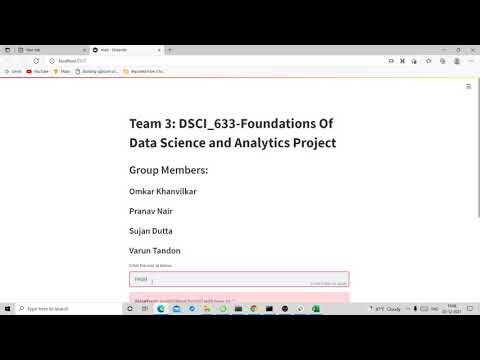

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="ZkeGyyop0oc",width=900,height=400)

### THE END